<a href="https://colab.research.google.com/github/sanskritisaxenaaa/sanskriti/blob/main/wallmart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload the ZIP file
uploaded = files.upload()

Saving Walmart DataSet.csv to Walmart DataSet.csv


In [2]:
import pandas as pd

df = pd.read_csv('Walmart DataSet.csv')

In [3]:
# Check for missing values
print(df.isnull().sum())


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [4]:
# Summary statistics for numerical columns
print(df.describe())

# Check data types and non-null counts
print(df.info())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


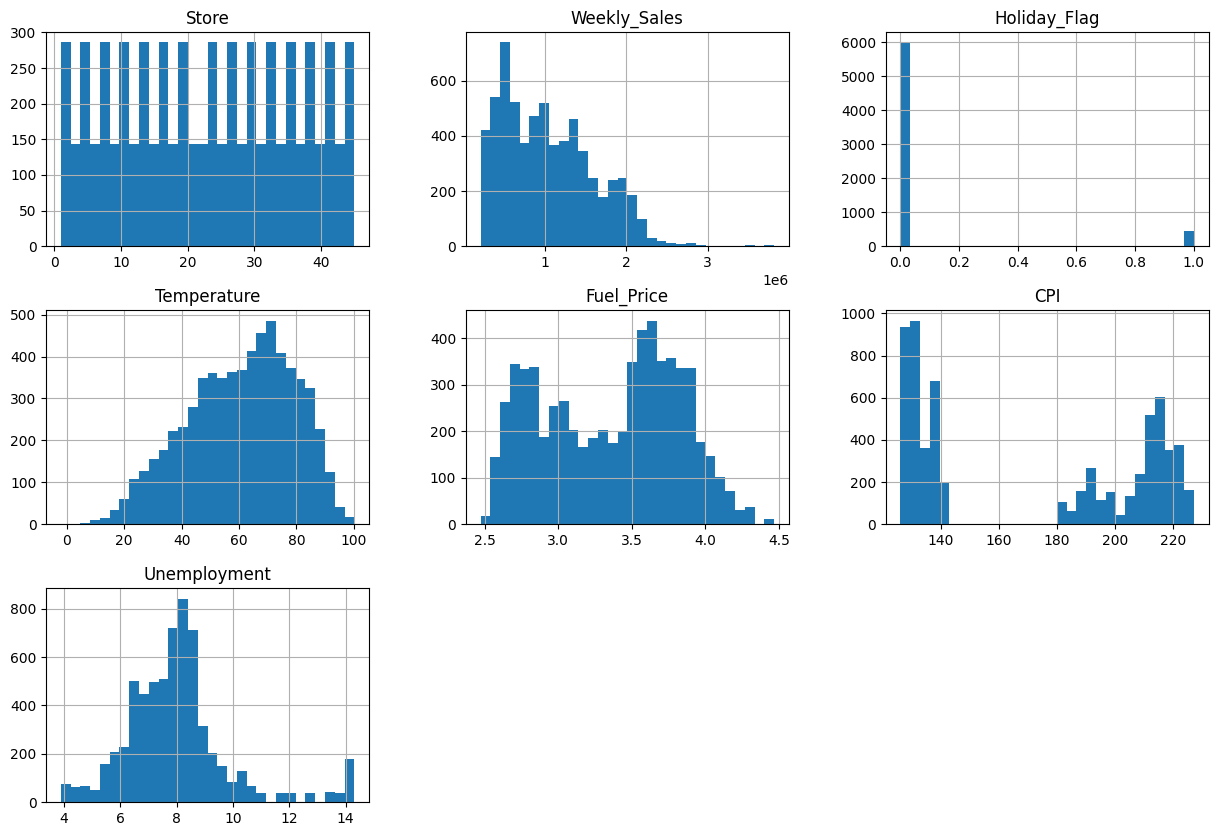

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.show()

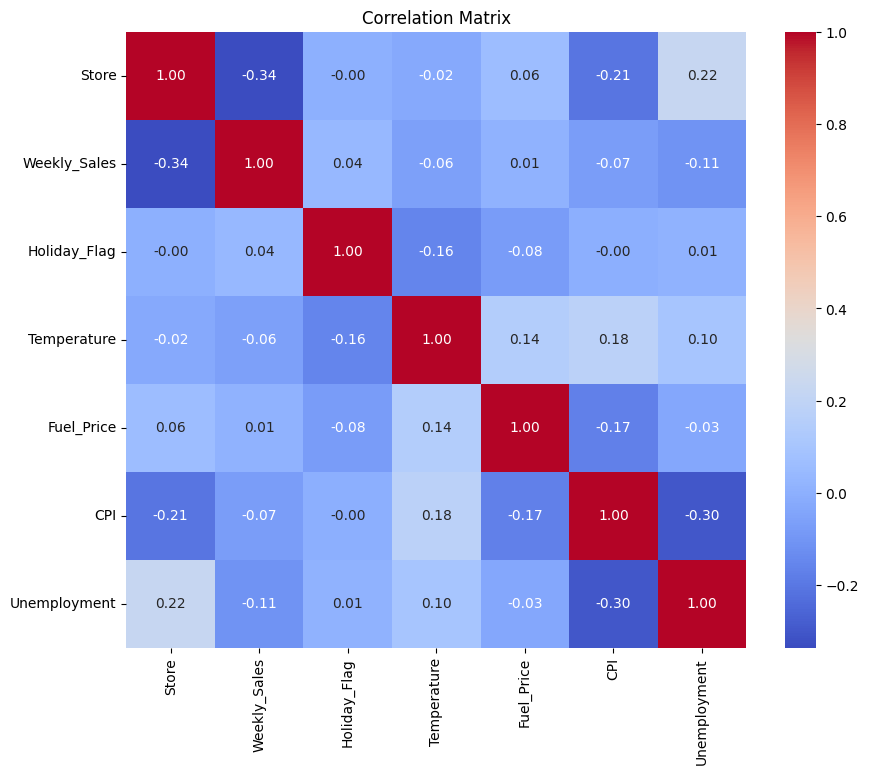

In [6]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64


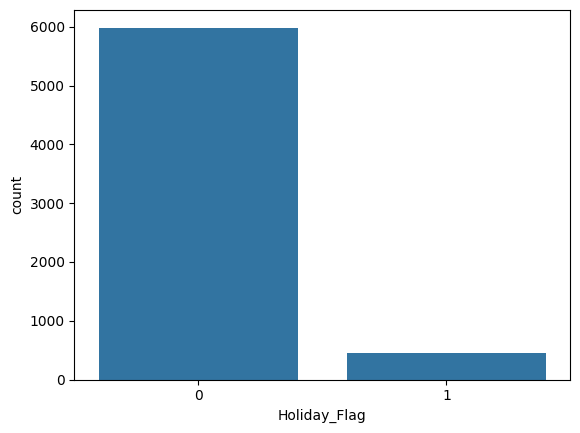

In [7]:
# Count of unique values in categorical columns
print(df['Holiday_Flag'].value_counts())

# Visualize the distribution of 'Holiday_Flag'
sns.countplot(x='Holiday_Flag', data=df)
plt.show()

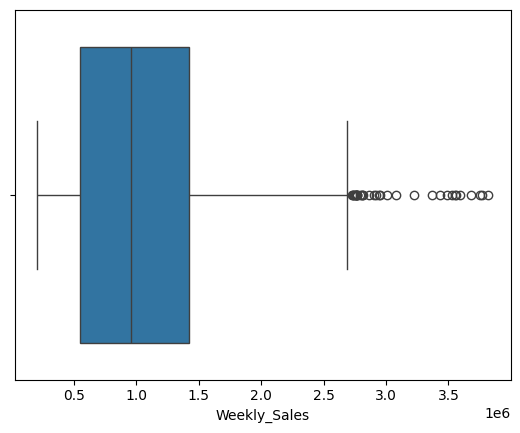

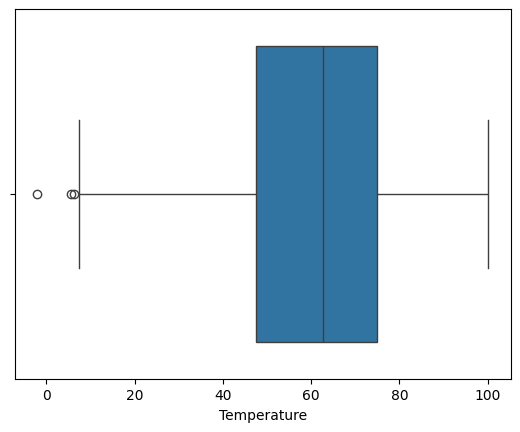

In [8]:
# Boxplot for 'Weekly_Sales'
sns.boxplot(x=df['Weekly_Sales'])
plt.show()

# Boxplot for 'Temperature'
sns.boxplot(x=df['Temperature'])
plt.show()

In [9]:
# Detect outliers using IQR method
Q1 = df["Weekly_Sales"].quantile(0.25)
Q3 = df["Weekly_Sales"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df["Weekly_Sales"] < lower_bound) | (df["Weekly_Sales"] > upper_bound)]

# Percentage of outliers in the dataset
outlier_percentage = (len(outliers) / len(df)) * 100

len(outliers), outlier_percentage


(34, 0.5283605283605284)

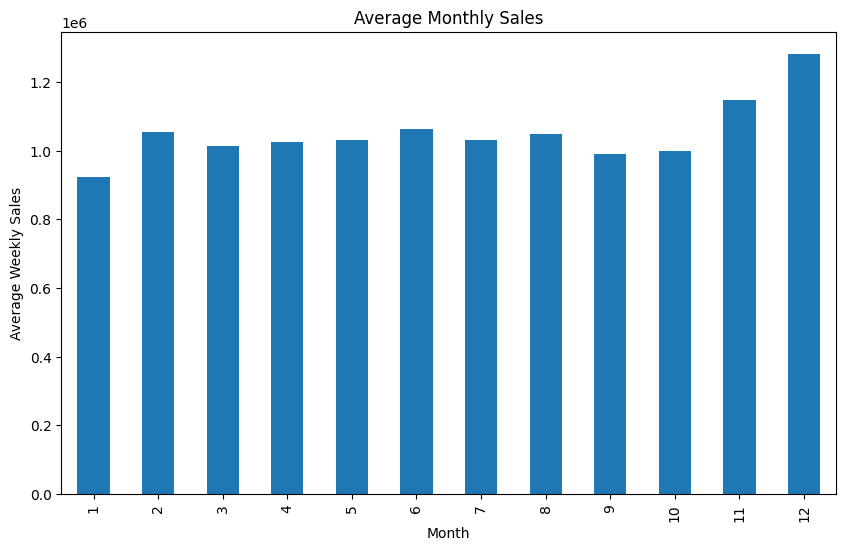

In [10]:
# Extract month and year from 'Date'
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Analyze sales by month
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()
monthly_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

In [11]:
df.to_csv("Cleaned_Walmart_DataSet.csv", index=False)

In [12]:
#Q1
# Correlation between Weekly_Sales and Unemployment
correlation = df['Weekly_Sales'].corr(df['Unemployment'])
print(f"Correlation between Weekly_Sales and Unemployment: {correlation}")

Correlation between Weekly_Sales and Unemployment: -0.10617608965795429


In [13]:
# Group by Store and calculate average Weekly_Sales and Unemployment
store_analysis = df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Unemployment': 'mean'
}).reset_index()


store_correlations = []
for store in store_analysis['Store'].unique():
    store_data = df[df['Store'] == store]
    correlation = store_data['Weekly_Sales'].corr(store_data['Unemployment'])
    store_correlations.append({'Store': store, 'Correlation': correlation})


store_correlations_df = pd.DataFrame(store_correlations)


store_correlations_df = store_correlations_df.sort_values(by='Correlation')


print("Stores most negatively affected by unemployment:")
print(store_correlations_df.head())

Stores most negatively affected by unemployment:
    Store  Correlation
37     38    -0.785290
43     44    -0.780076
38     39    -0.384681
41     42    -0.356355
40     41    -0.350630


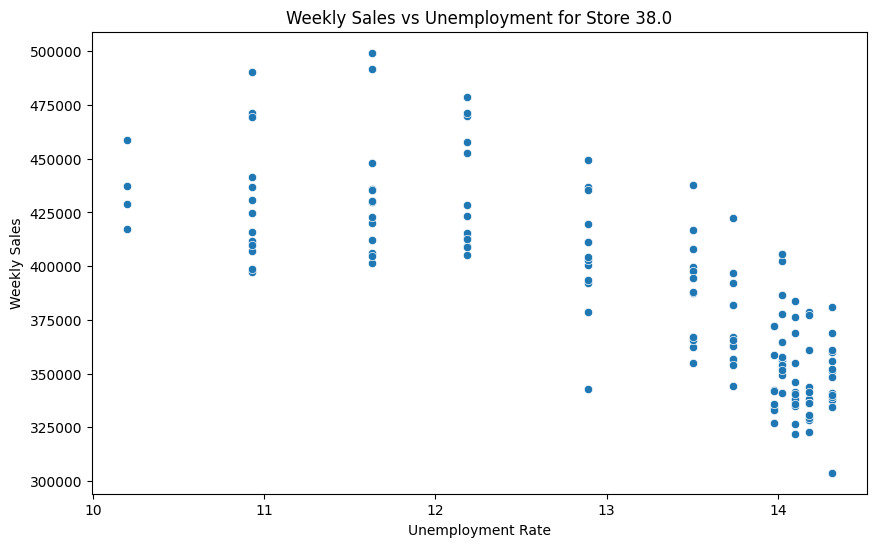

In [14]:
##Weekly_Sales vs Unemployment for the most affected store
most_affected_store = store_correlations_df.iloc[0]['Store']
store_data = df[df['Store'] == most_affected_store]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=store_data)
plt.title(f'Weekly Sales vs Unemployment for Store {most_affected_store}')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
#Q2

In [15]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract month, quarter, and week of the year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Week_of_Year'] = df['Date'].dt.isocalendar().week

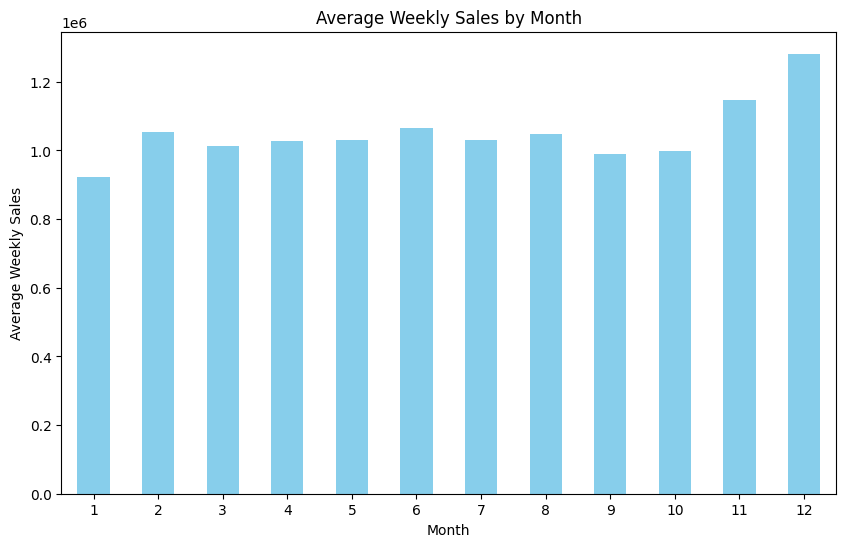

In [16]:
# Group by month and calculate average weekly sales
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

# Plot monthly sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

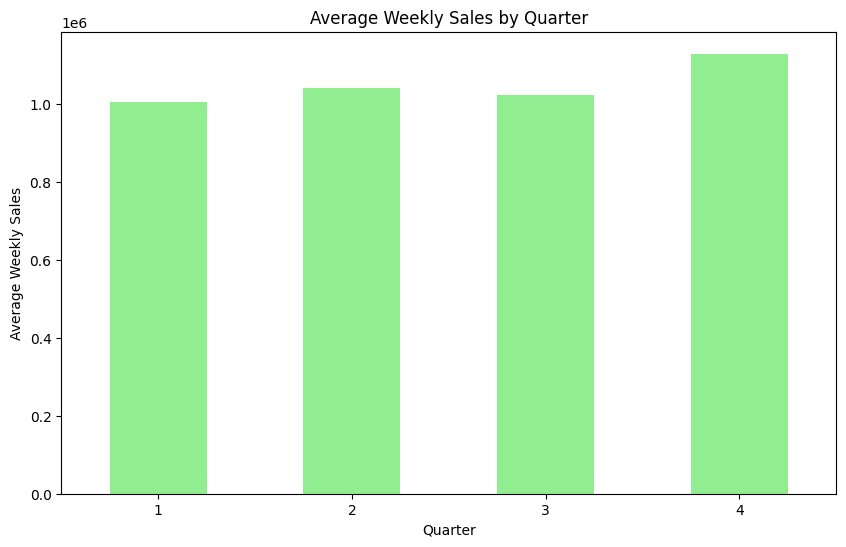

In [17]:
# Group by quarter and calculate average weekly sales
quarterly_sales = df.groupby('Quarter')['Weekly_Sales'].mean()

# Plot quarterly sales trends
plt.figure(figsize=(10, 6))
quarterly_sales.plot(kind='bar', color='lightgreen')
plt.title('Average Weekly Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

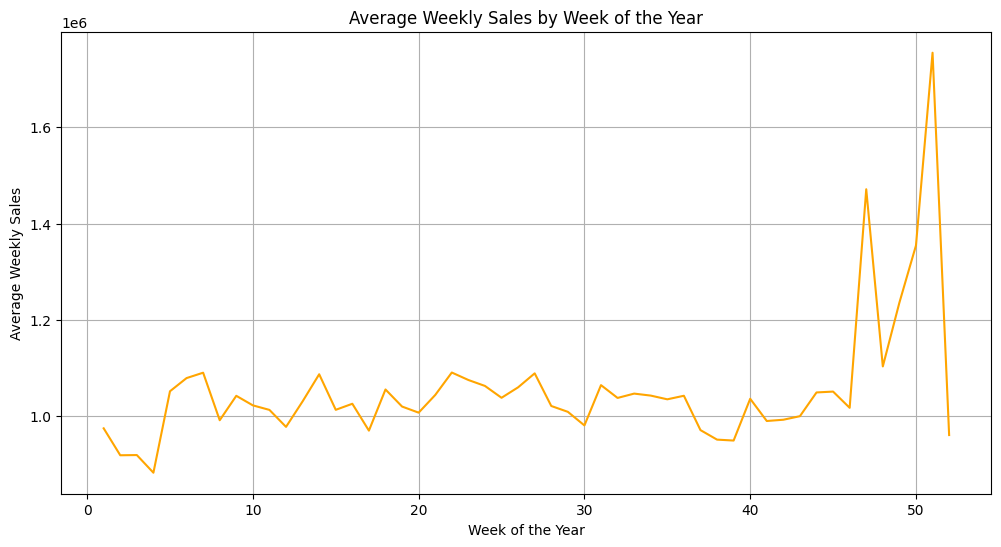

In [18]:
# Group by week of the year and calculate average weekly sales
weekly_sales = df.groupby('Week_of_Year')['Weekly_Sales'].mean()

# Plot weekly sales trends
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', color='orange')
plt.title('Average Weekly Sales by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Weekly Sales')
plt.grid()
plt.show()


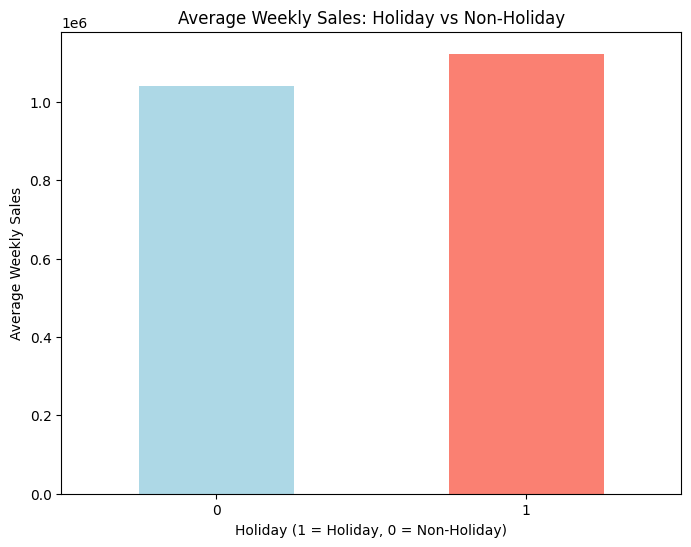

In [19]:
# Group by Holiday_Flag and calculate average weekly sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Plot holiday vs non-holiday sales
plt.figure(figsize=(8, 6))
holiday_sales.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday (1 = Holiday, 0 = Non-Holiday)')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Q3

In [20]:
# Correlation between Temperature and Weekly_Sales
correlation = df['Temperature'].corr(df['Weekly_Sales'])
print(f"Correlation between Temperature and Weekly_Sales: {correlation}")

Correlation between Temperature and Weekly_Sales: -0.06381001317946955


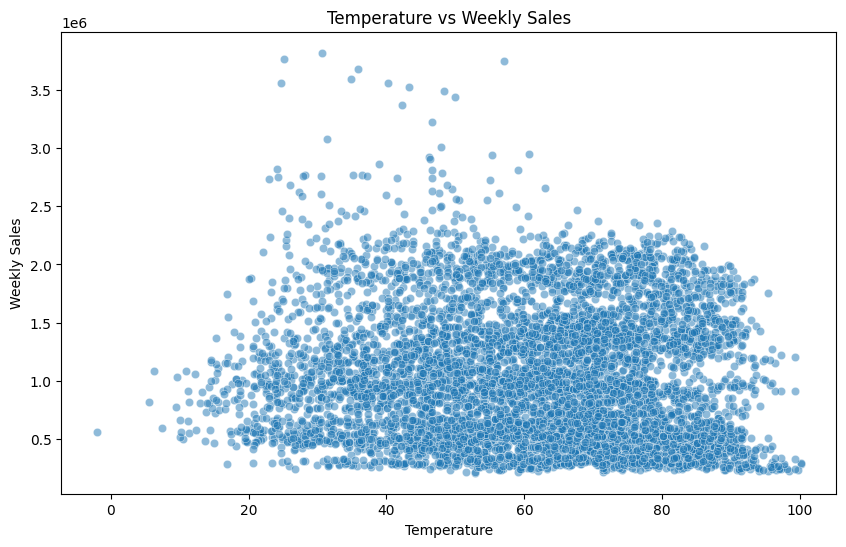

In [21]:
# Scatter plot of Temperature vs Weekly_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.5)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

<ipython-input-22-45f7eebc7147>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_sales = df.groupby('Temperature_Range')['Weekly_Sales'].mean()


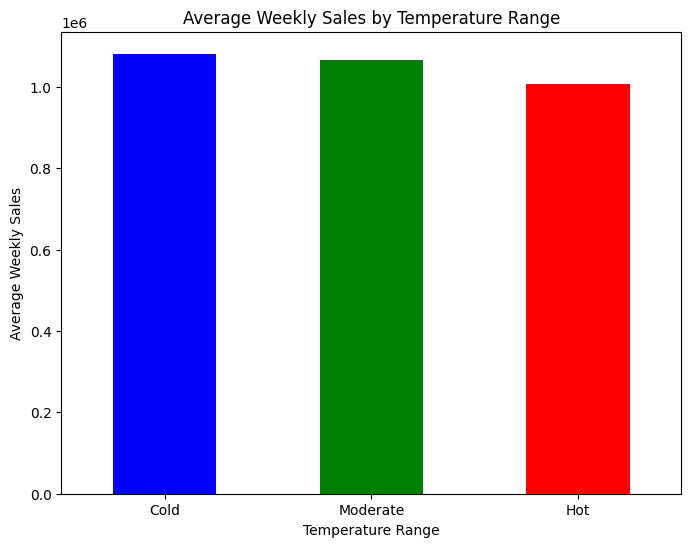

In [22]:
# Create temperature ranges
df['Temperature_Range'] = pd.cut(df['Temperature'], bins=[-20, 40, 70, 100], labels=['Cold', 'Moderate', 'Hot'])

# Group by temperature range and calculate average weekly sales
temperature_sales = df.groupby('Temperature_Range')['Weekly_Sales'].mean()

# Plot average sales by temperature range
plt.figure(figsize=(8, 6))
temperature_sales.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average Weekly Sales by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
X = df[['Temperature']]
y = df['Weekly_Sales']
model = LinearRegression()
model.fit(X, y)

# Print the slope and intercept
print(f"Slope (Impact of Temperature on Sales): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Slope (Impact of Temperature on Sales): -1952.4192272081975
Intercept: 1165406.0127923777


In [24]:
# Group by Store and calculate correlation between Temperature and Weekly_Sales
store_correlations = []
for store in df['Store'].unique():
    store_data = df[df['Store'] == store]
    correlation = store_data['Temperature'].corr(store_data['Weekly_Sales'])
    store_correlations.append({'Store': store, 'Correlation': correlation})

# Convert to DataFrame
store_correlations_df = pd.DataFrame(store_correlations)

# Sort by Correlation to identify stores most affected by temperature
store_correlations_df = store_correlations_df.sort_values(by='Correlation')

# Display the top 5 stores most affected by temperature
print("Stores most affected by temperature:")
print(store_correlations_df.head())

Stores most affected by temperature:
    Store  Correlation
9      10    -0.432569
11     12    -0.379416
2       3    -0.377524
27     28    -0.376506
29     30    -0.330816


In [25]:
# Correlation between CPI and Weekly_Sales
correlation = df['CPI'].corr(df['Weekly_Sales'])
print(f"Correlation between CPI and Weekly_Sales: {correlation}")

Correlation between CPI and Weekly_Sales: -0.07263416204017632


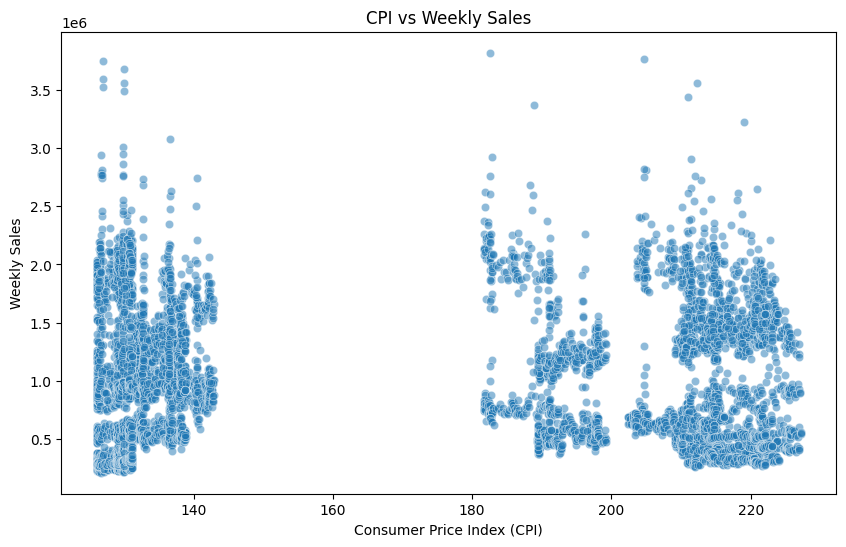

In [26]:
# Scatter plot of CPI vs Weekly_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, alpha=0.5)
plt.title('CPI vs Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.show()

<ipython-input-27-49ce4bb9352b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpi_sales = df.groupby('CPI_Range')['Weekly_Sales'].mean()


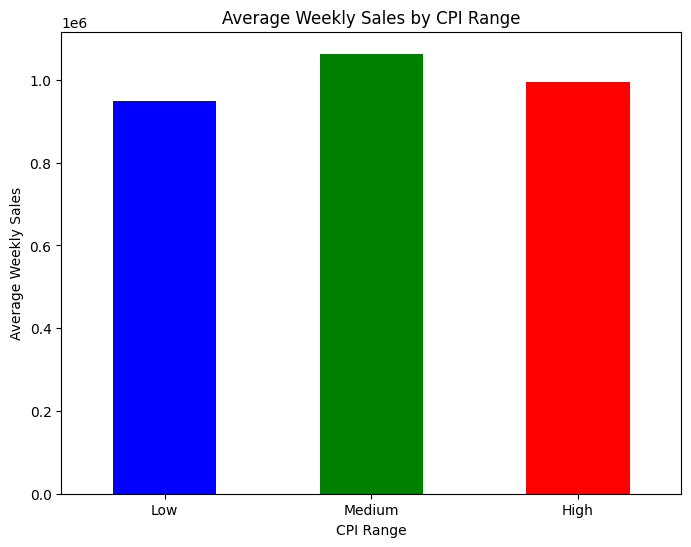

In [27]:
# Create CPI ranges
df['CPI_Range'] = pd.cut(df['CPI'], bins=[190, 200, 210, 220], labels=['Low', 'Medium', 'High'])

# Group by CPI range and calculate average weekly sales
cpi_sales = df.groupby('CPI_Range')['Weekly_Sales'].mean()

# Plot average sales by CPI range
plt.figure(figsize=(8, 6))
cpi_sales.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average Weekly Sales by CPI Range')
plt.xlabel('CPI Range')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
X = df[['CPI']]
y = df['Weekly_Sales']
model = LinearRegression()
model.fit(X, y)

# Print the slope and intercept
print(f"Slope (Impact of CPI on Sales): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Slope (Impact of CPI on Sales): -1041.557952513
Intercept: 1225673.7181543761


In [29]:
# Group by Store and calculate correlation between CPI and Weekly_Sales
store_correlations = []
for store in df['Store'].unique():
    store_data = df[df['Store'] == store]
    correlation = store_data['CPI'].corr(store_data['Weekly_Sales'])
    store_correlations.append({'Store': store, 'Correlation': correlation})

# Convert to DataFrame
store_correlations_df = pd.DataFrame(store_correlations)

# Sort by Correlation to identify stores most affected by CPI
store_correlations_df = store_correlations_df.sort_values(by='Correlation')

# Display the top 5 stores most affected by CPI
print("Stores most affected by CPI:")
print(store_correlations_df.head())

Stores most affected by CPI:
    Store  Correlation
35     36    -0.915095
34     35    -0.424107
13     14    -0.419755
29     30    -0.298188
42     43    -0.285686


In [ ]:
#Q4

In [30]:
# Group by Store and calculate total and average weekly sales
store_performance = df.groupby('Store').agg({
    'Weekly_Sales': ['sum', 'mean']
}).reset_index()

# Rename columns for clarity
store_performance.columns = ['Store', 'Total_Sales', 'Average_Sales']

# Sort by Total_Sales to identify top and worst-performing stores
store_performance = store_performance.sort_values(by='Total_Sales', ascending=False)

# Display the top 5 and bottom 5 stores
print("Top 5 Performing Stores:")
print(store_performance.head())

print("\nBottom 5 Performing Stores:")
print(store_performance.tail())

Top 5 Performing Stores:
    Store   Total_Sales  Average_Sales
19     20  3.013978e+08   2.107677e+06
3       4  2.995440e+08   2.094713e+06
13     14  2.889999e+08   2.020978e+06
12     13  2.865177e+08   2.003620e+06
1       2  2.753824e+08   1.925751e+06

Bottom 5 Performing Stores:
    Store  Total_Sales  Average_Sales
37     38  55159626.42  385731.653287
35     36  53412214.97  373511.992797
4       5  45475688.90  318011.810490
43     44  43293087.84  302748.866014
32     33  37160221.96  259861.692028


In [31]:
# Top 5 performing stores by total sales
top_stores = store_performance.head(5)
print("Top 5 Performing Stores by Total Sales:")
print(top_stores)

Top 5 Performing Stores by Total Sales:
    Store   Total_Sales  Average_Sales
19     20  3.013978e+08   2.107677e+06
3       4  2.995440e+08   2.094713e+06
13     14  2.889999e+08   2.020978e+06
12     13  2.865177e+08   2.003620e+06
1       2  2.753824e+08   1.925751e+06


In [ ]:
#Q5

In [32]:
# Worst-performing store by total sales
worst_store = store_performance.tail(1)
print("Worst-Performing Store by Total Sales:")
print(worst_store)

Worst-Performing Store by Total Sales:
    Store  Total_Sales  Average_Sales
32     33  37160221.96  259861.692028


In [33]:
# Highest and lowest performing stores
highest_sales = store_performance.iloc[0]['Total_Sales']
lowest_sales = store_performance.iloc[-1]['Total_Sales']

# Calculate the difference
sales_difference = highest_sales - lowest_sales

# Calculate the percentage difference
percentage_difference = (sales_difference / highest_sales) * 100

print(f"Difference in Total Sales between Highest and Lowest Performing Stores: ${sales_difference:,.2f}")
print(f"Percentage Difference: {percentage_difference:.2f}%")

Difference in Total Sales between Highest and Lowest Performing Stores: $264,237,570.50
Percentage Difference: 87.67%


<ipython-input-34-7a24d4eddaeb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Total_Sales', data=store_performance, palette='viridis')


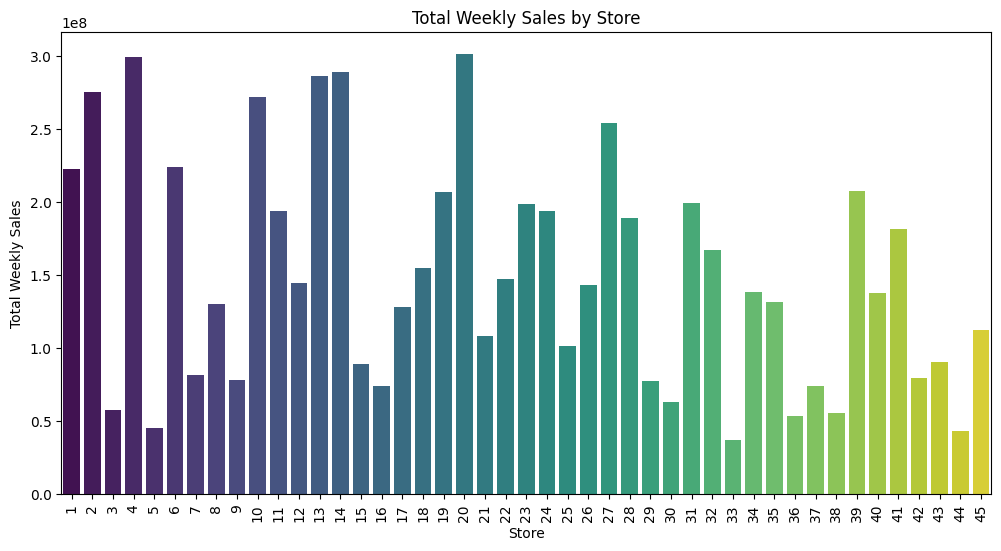

In [34]:
# Plot total sales by store
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Total_Sales', data=store_performance, palette='viridis')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Q Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [35]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df = df.sort_values(by=['Store', 'Date'])

In [36]:
# Create a dictionary to store data for each store
store_data = {store: df[df['Store'] == store] for store in df['Store'].unique()}

In [ ]:
! pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/6ce7tc70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/j_a16w1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29803', 'data', 'file=/tmp/tmpddcqt8fc/6ce7tc70.json', 'init=/tmp/tmpddcqt8fc/j_a16w1g.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelgqmmu0xj/prophet_model-20250312193835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


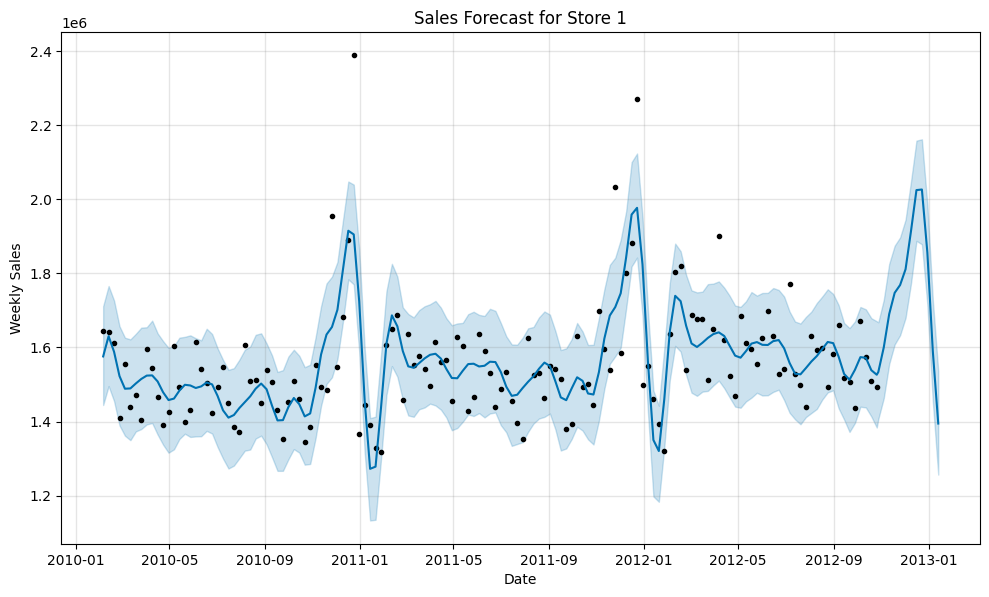

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/1xi7_fuy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/0ngq9z5n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34069', 'data', 'file=/tmp/tmpddcqt8fc/1xi7_fuy.json', 'init=/tmp/tmpddcqt8fc/0ngq9z5n.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelxv6faikw/prophet_model-20250312193836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


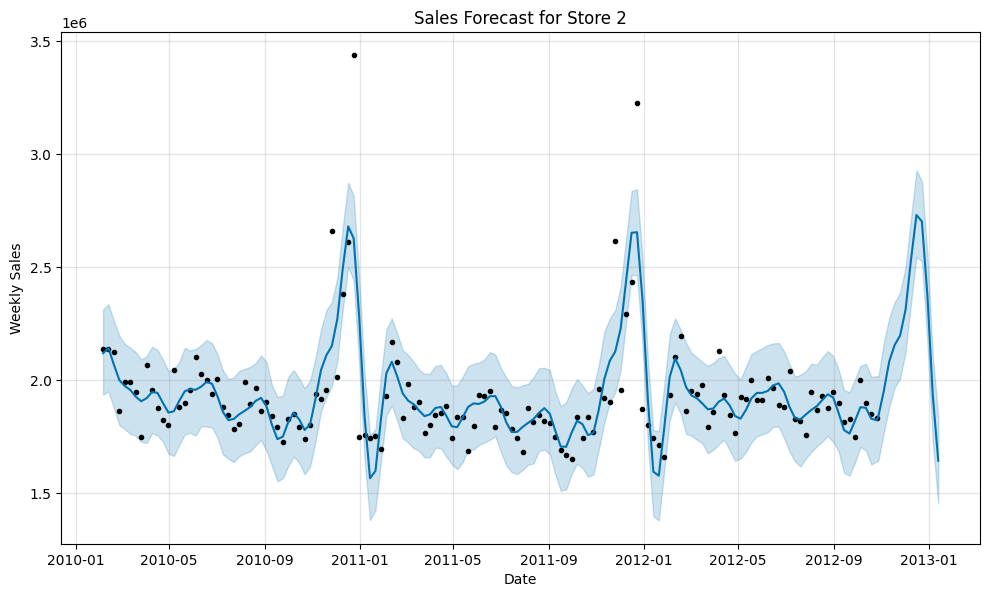

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/4ncdwqgn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/0p__as4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40643', 'data', 'file=/tmp/tmpddcqt8fc/4ncdwqgn.json', 'init=/tmp/tmpddcqt8fc/0p__as4y.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelasx8rnzr/prophet_model-20250312193836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


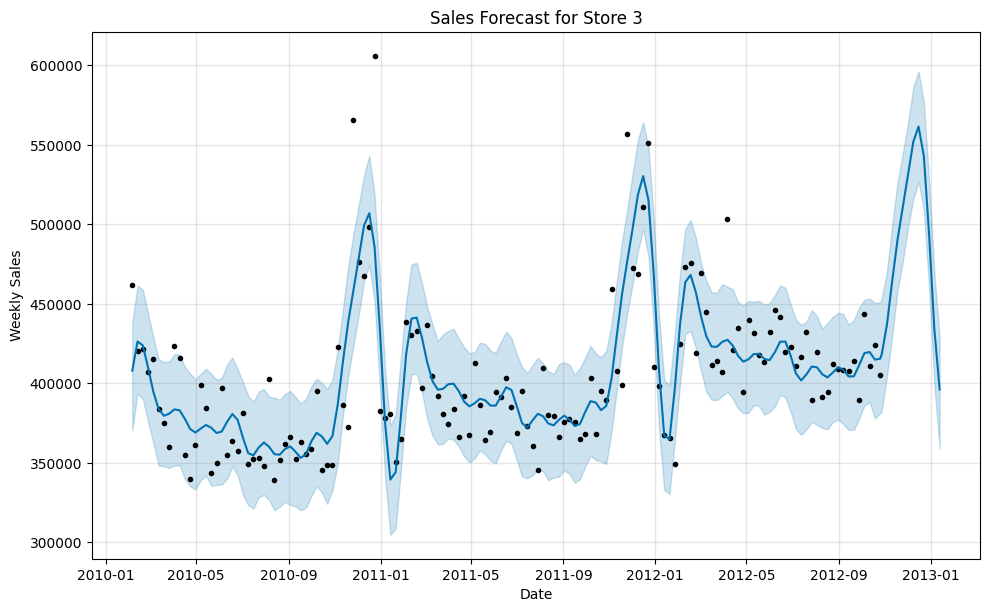

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/e4omryuc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/vtpm_ydt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91782', 'data', 'file=/tmp/tmpddcqt8fc/e4omryuc.json', 'init=/tmp/tmpddcqt8fc/vtpm_ydt.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelmdstxzyw/prophet_model-20250312193836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


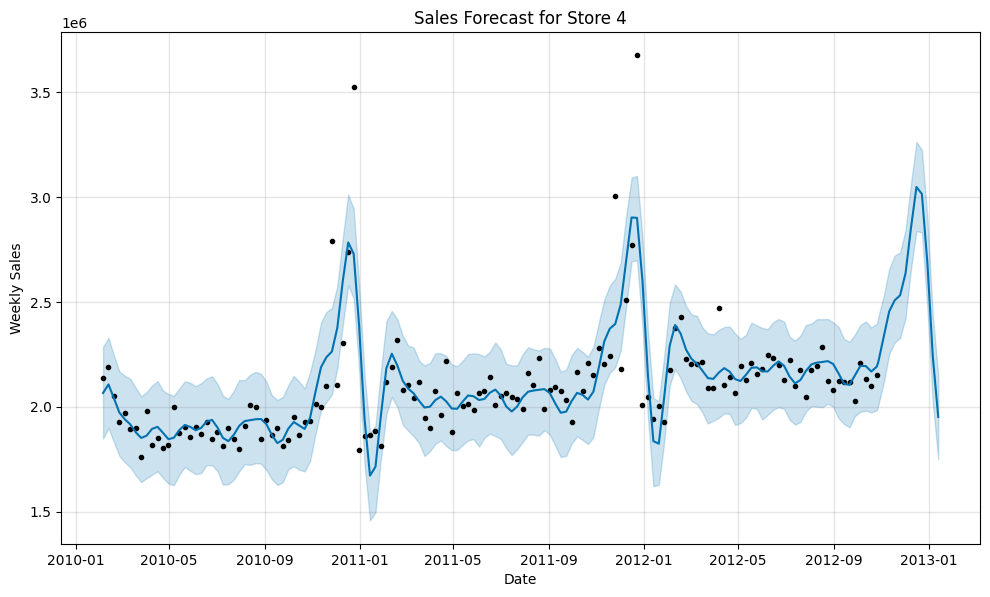

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/xm_c050j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/jhdg6sq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22142', 'data', 'file=/tmp/tmpddcqt8fc/xm_c050j.json', 'init=/tmp/tmpddcqt8fc/jhdg6sq2.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_model1ba73k9c/prophet_model-20250312193837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


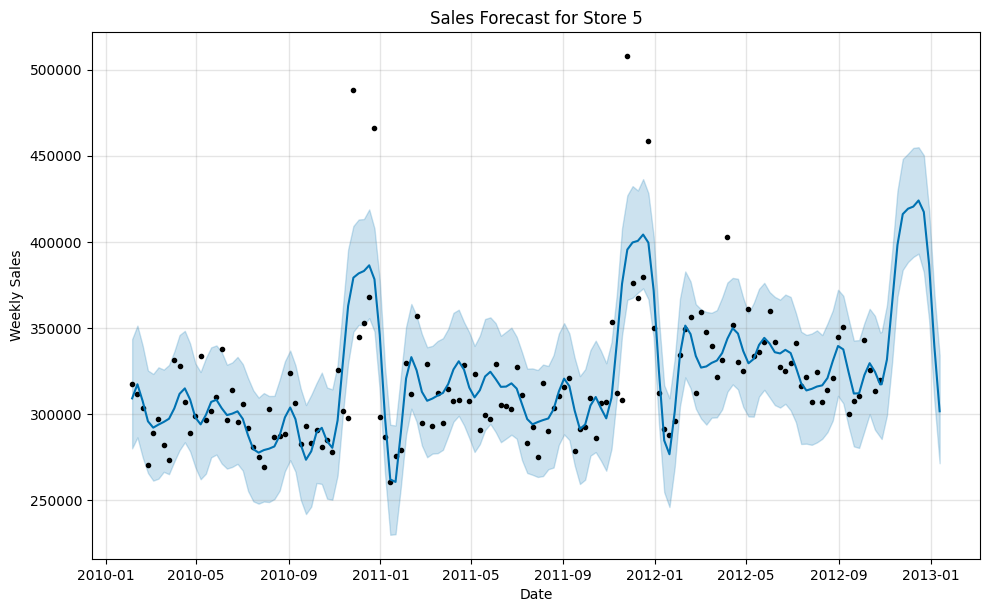

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/g3ph34bv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/hinam6ir.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52485', 'data', 'file=/tmp/tmpddcqt8fc/g3ph34bv.json', 'init=/tmp/tmpddcqt8fc/hinam6ir.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modeliuv10kia/prophet_model-20250312193837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


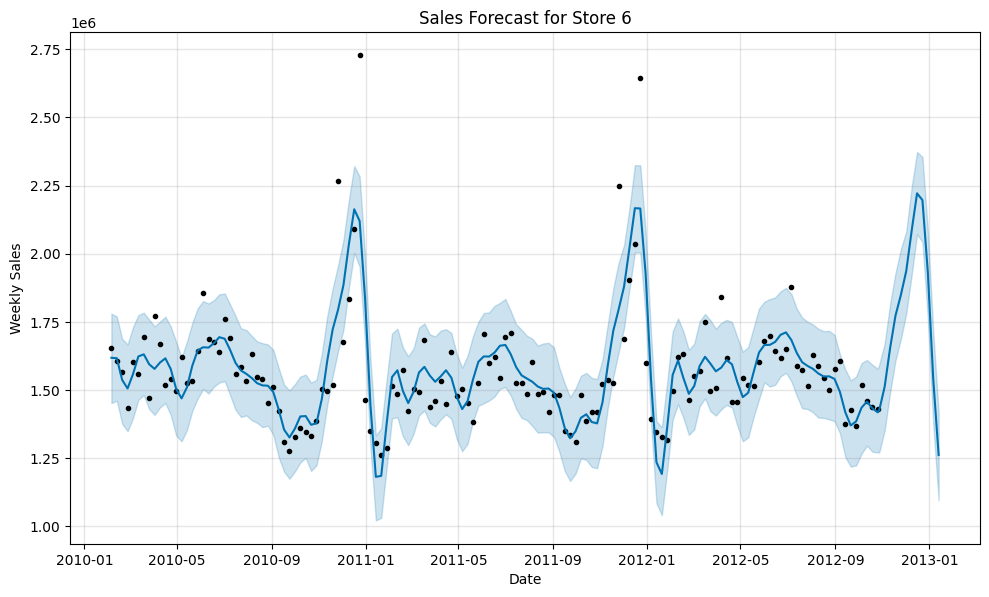

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/mbxc5jf3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/_ad1o77x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48120', 'data', 'file=/tmp/tmpddcqt8fc/mbxc5jf3.json', 'init=/tmp/tmpddcqt8fc/_ad1o77x.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelnk4eivs9/prophet_model-20250312193838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


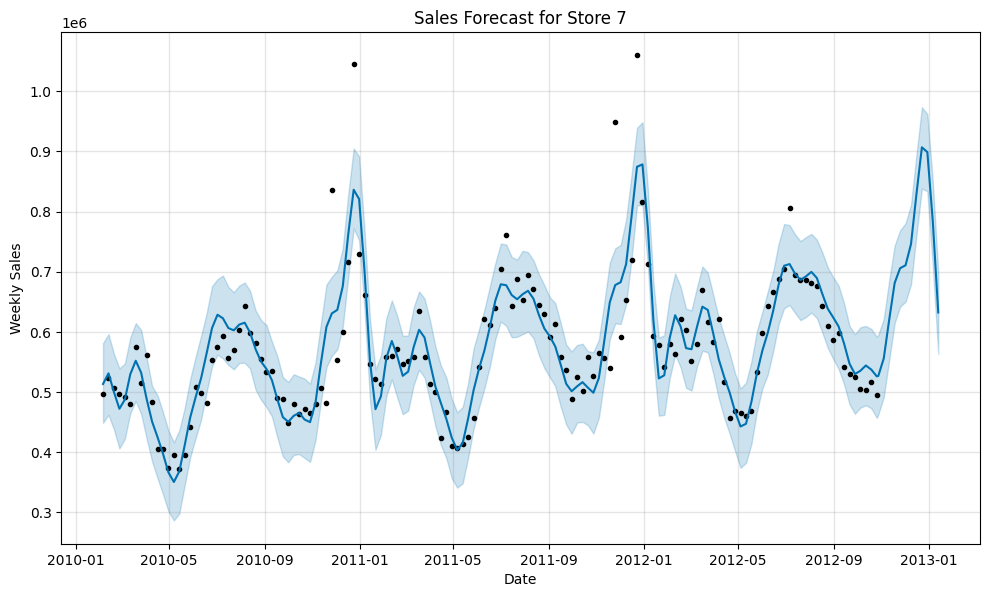

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/02bjc9vx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/m9ngktcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13004', 'data', 'file=/tmp/tmpddcqt8fc/02bjc9vx.json', 'init=/tmp/tmpddcqt8fc/m9ngktcr.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_model5pkwsvui/prophet_model-20250312193838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


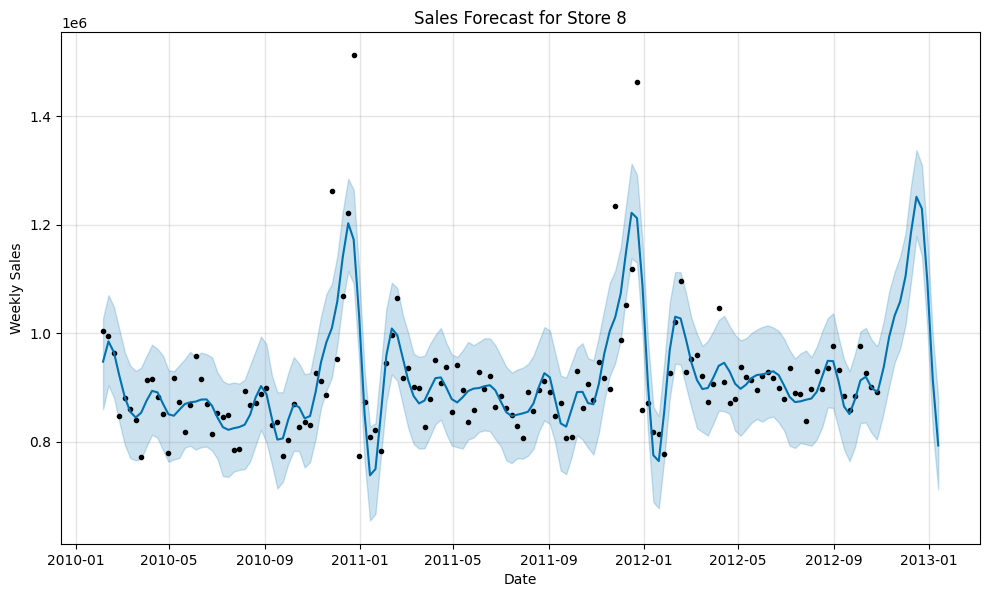

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/g2ud3al9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/oi_h8ft9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23241', 'data', 'file=/tmp/tmpddcqt8fc/g2ud3al9.json', 'init=/tmp/tmpddcqt8fc/oi_h8ft9.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelzbpmktml/prophet_model-20250312193839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


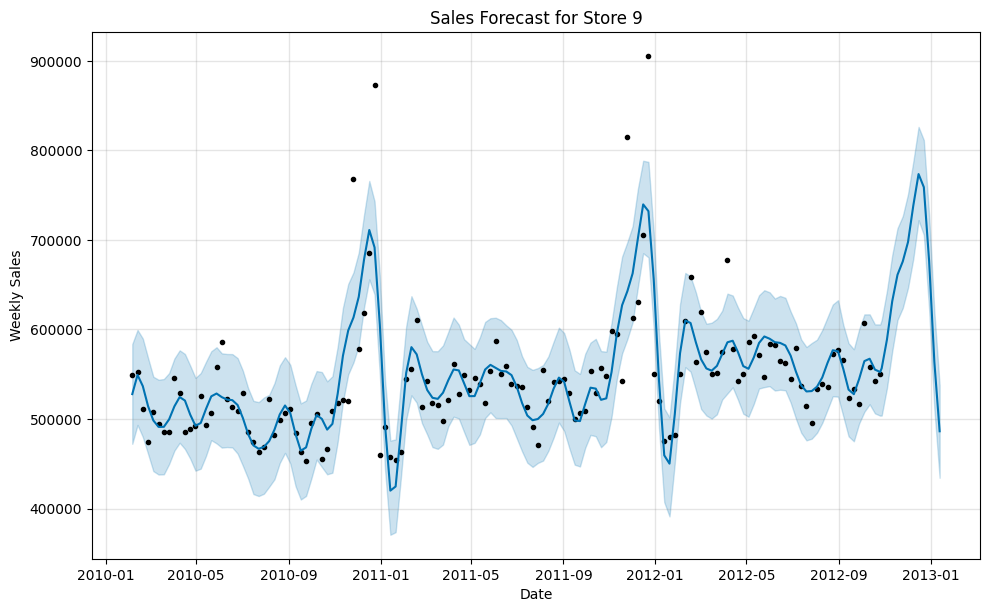

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/e59rqsdo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/jnnu3o9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21398', 'data', 'file=/tmp/tmpddcqt8fc/e59rqsdo.json', 'init=/tmp/tmpddcqt8fc/jnnu3o9e.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelqakce5q9/prophet_model-20250312193839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


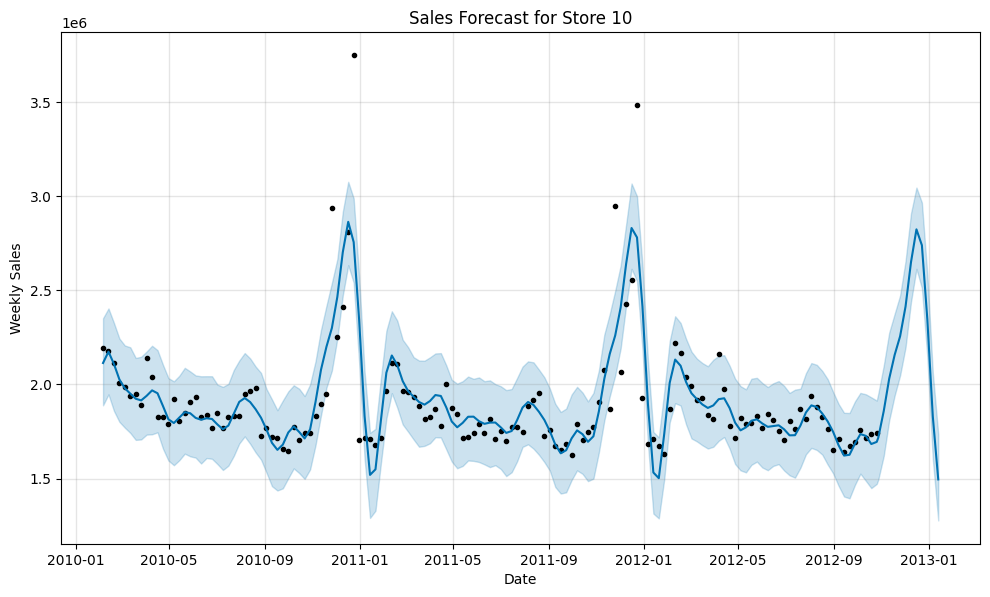

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/qqnxac84.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/hyvzrzho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8565', 'data', 'file=/tmp/tmpddcqt8fc/qqnxac84.json', 'init=/tmp/tmpddcqt8fc/hyvzrzho.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modeld5wboucl/prophet_model-20250312193840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


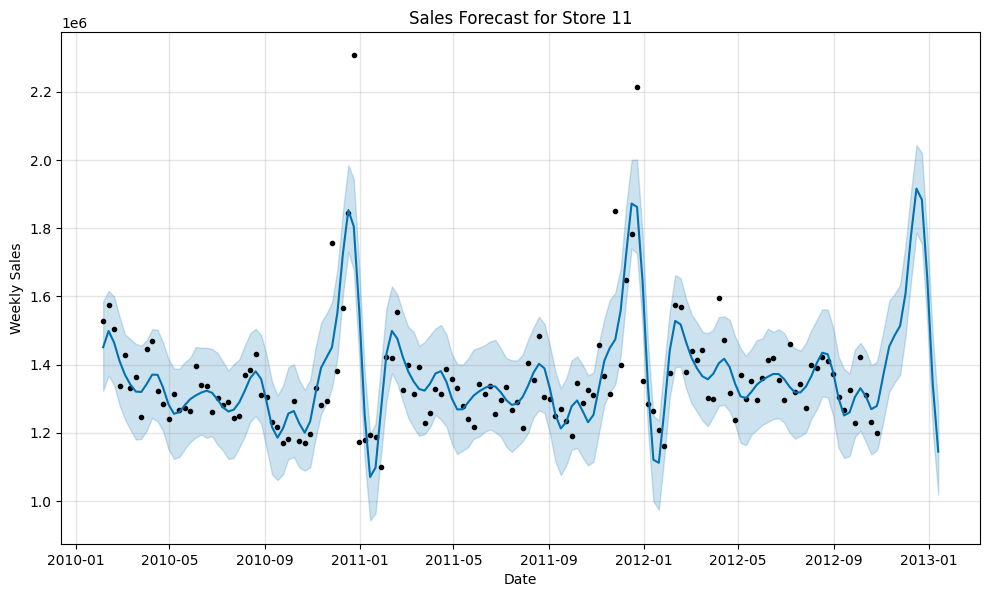

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/f2r616wl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/cge8s5ev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6294', 'data', 'file=/tmp/tmpddcqt8fc/f2r616wl.json', 'init=/tmp/tmpddcqt8fc/cge8s5ev.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modellf542jqc/prophet_model-20250312193840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


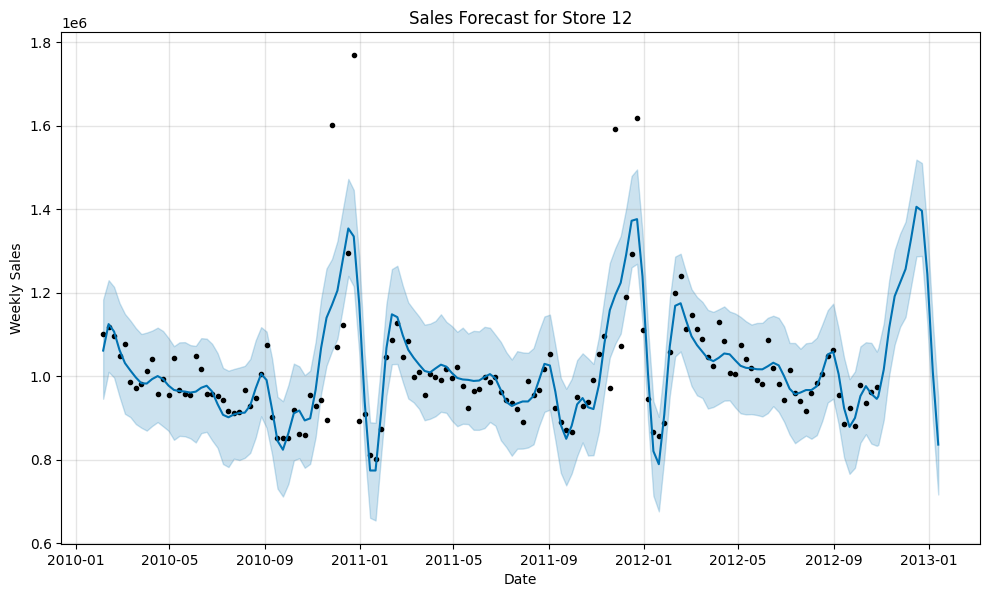

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/dp2wqmyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/54cdt76d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77519', 'data', 'file=/tmp/tmpddcqt8fc/dp2wqmyf.json', 'init=/tmp/tmpddcqt8fc/54cdt76d.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelqd4fx99t/prophet_model-20250312193841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


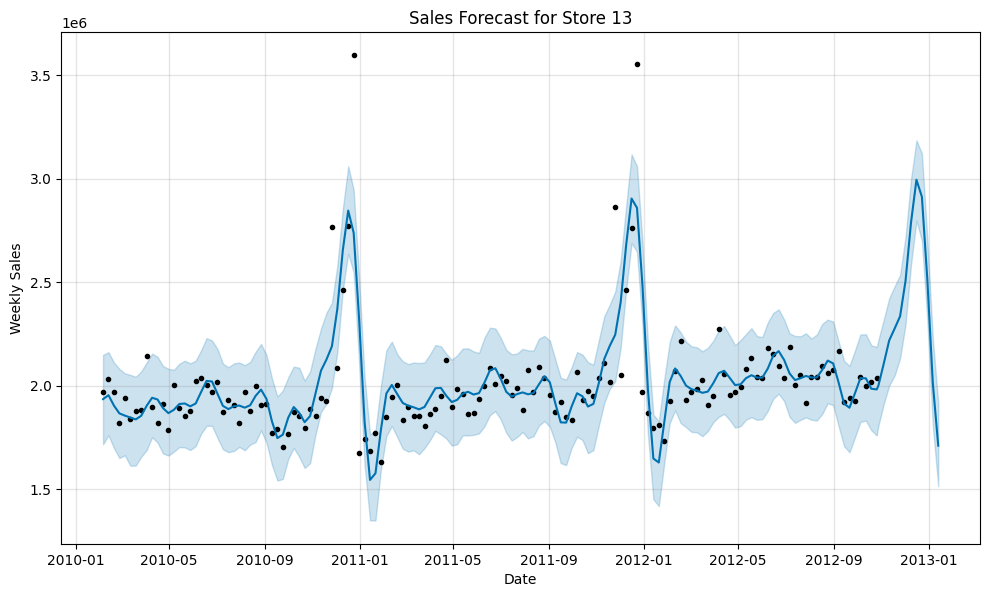

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/it49pkku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/yhcaa1nj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62072', 'data', 'file=/tmp/tmpddcqt8fc/it49pkku.json', 'init=/tmp/tmpddcqt8fc/yhcaa1nj.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_model2puv57yg/prophet_model-20250312193841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


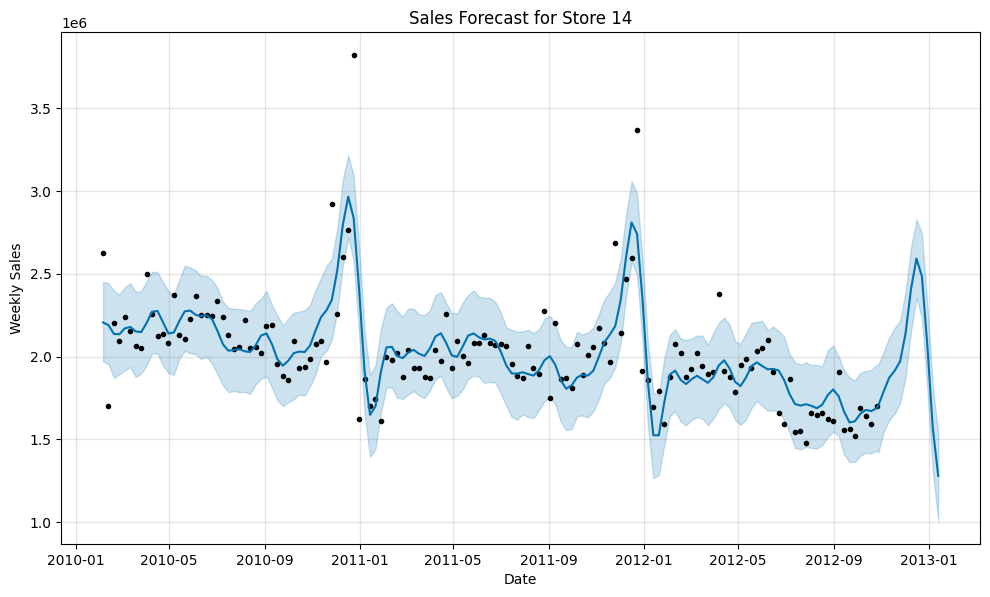

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/r9o9eoz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/0ok7pj1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37402', 'data', 'file=/tmp/tmpddcqt8fc/r9o9eoz8.json', 'init=/tmp/tmpddcqt8fc/0ok7pj1a.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelbdu22whr/prophet_model-20250312193842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


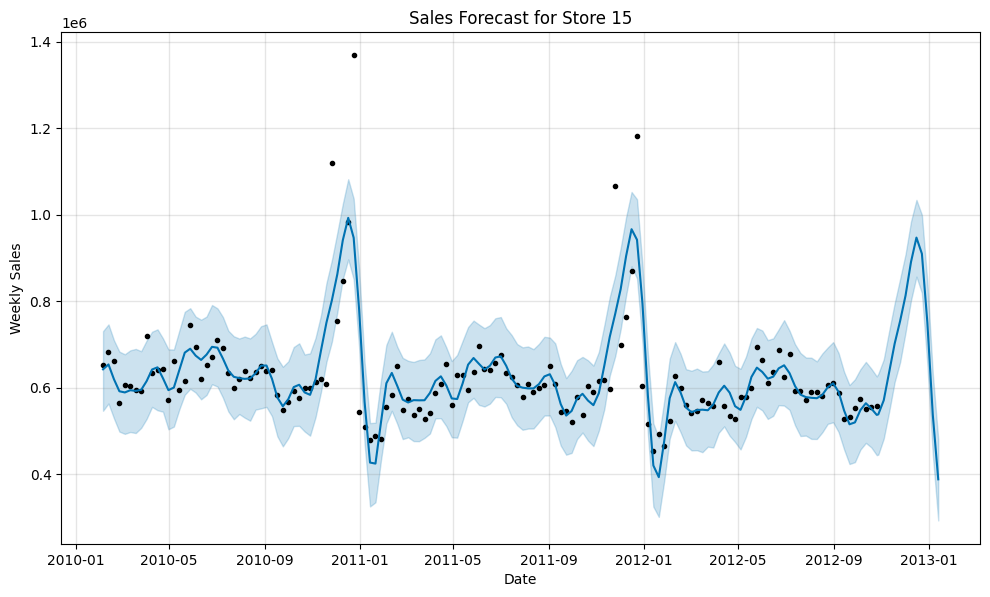

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/_ch4nqqf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/7r76bscz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38253', 'data', 'file=/tmp/tmpddcqt8fc/_ch4nqqf.json', 'init=/tmp/tmpddcqt8fc/7r76bscz.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_model3wvycylw/prophet_model-20250312193843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


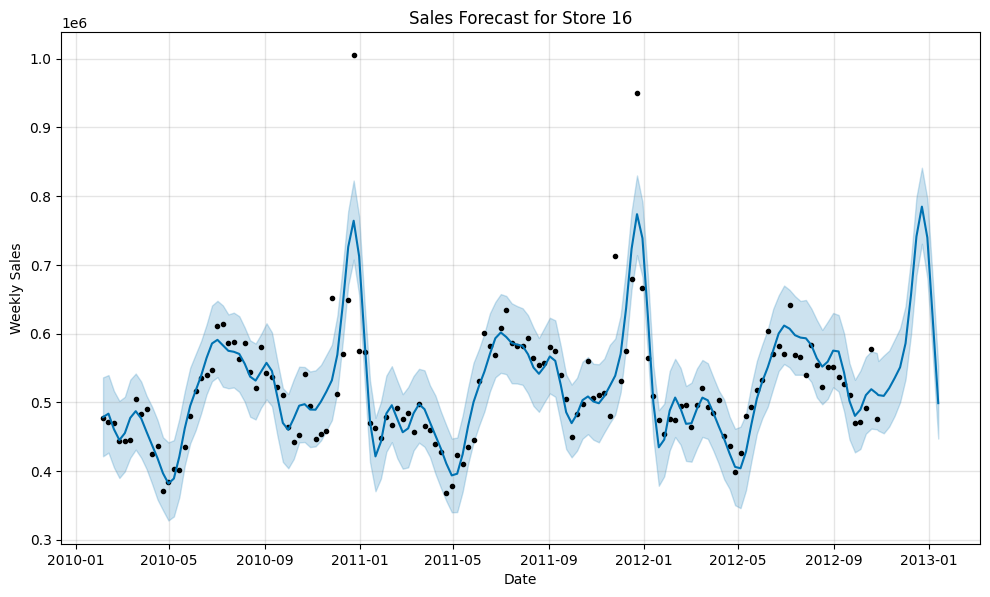

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/1mg08n9w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/p1kojfhk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64135', 'data', 'file=/tmp/tmpddcqt8fc/1mg08n9w.json', 'init=/tmp/tmpddcqt8fc/p1kojfhk.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelsnc4qr0j/prophet_model-20250312193844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


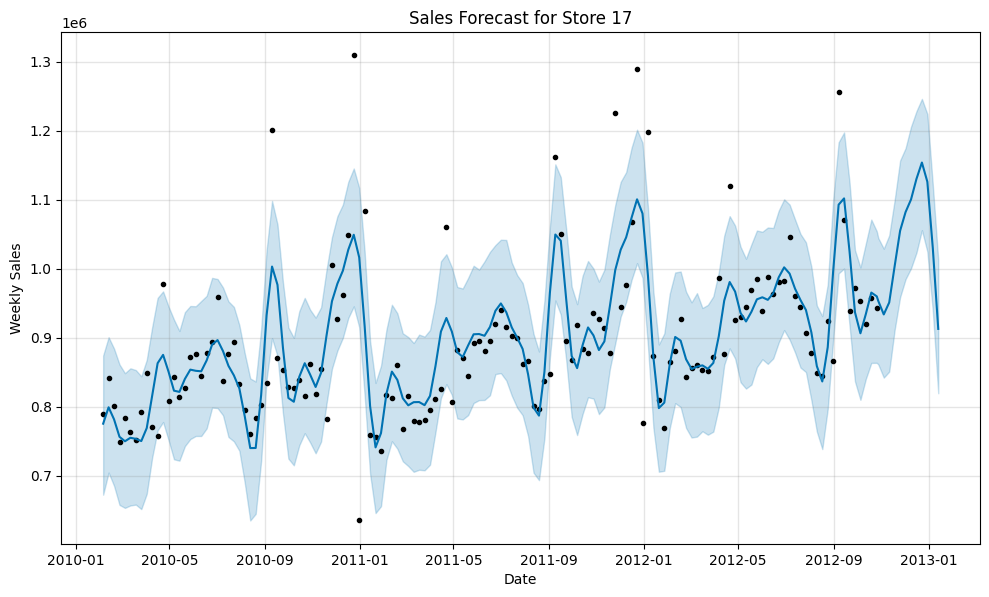

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/6awgb6v0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/0w16o6o9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19324', 'data', 'file=/tmp/tmpddcqt8fc/6awgb6v0.json', 'init=/tmp/tmpddcqt8fc/0w16o6o9.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelx8h2tyw4/prophet_model-20250312193844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


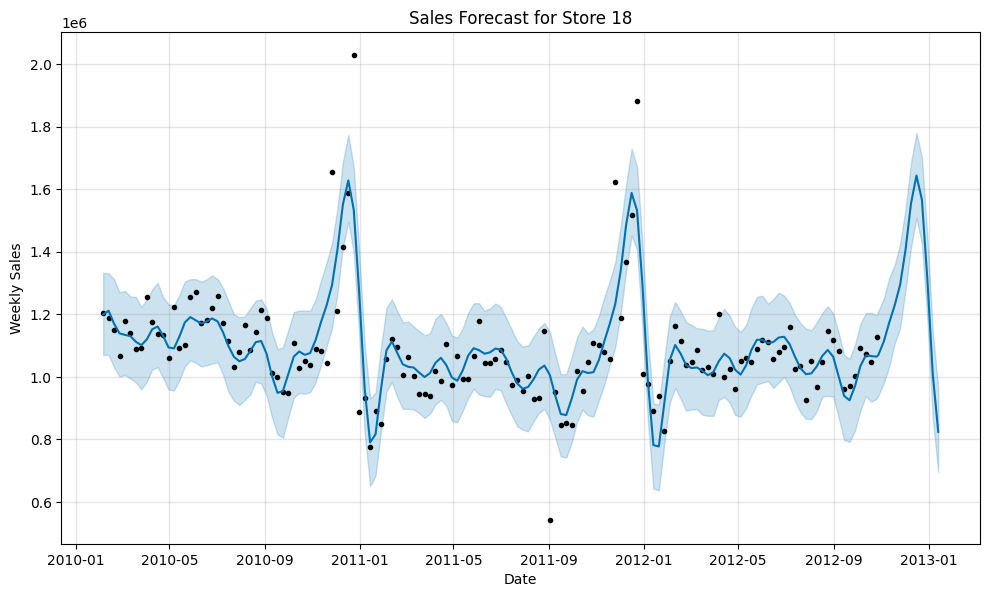

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/45v8ux89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/isr8kdme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42273', 'data', 'file=/tmp/tmpddcqt8fc/45v8ux89.json', 'init=/tmp/tmpddcqt8fc/isr8kdme.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_model59x9uu7v/prophet_model-20250312193845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


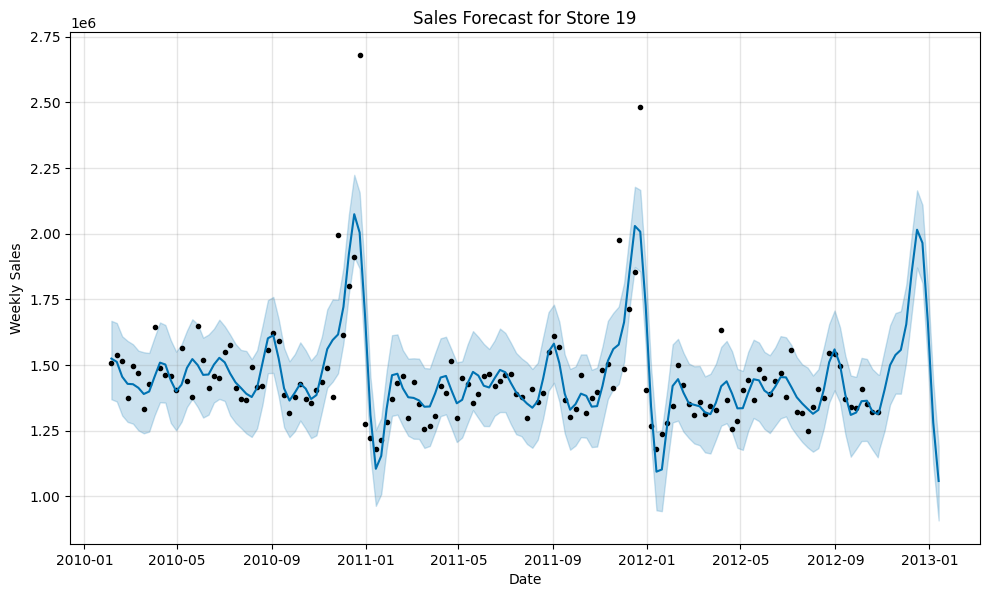

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/27fx8cjg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/dmr1el3g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62306', 'data', 'file=/tmp/tmpddcqt8fc/27fx8cjg.json', 'init=/tmp/tmpddcqt8fc/dmr1el3g.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelewrkt55q/prophet_model-20250312193846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


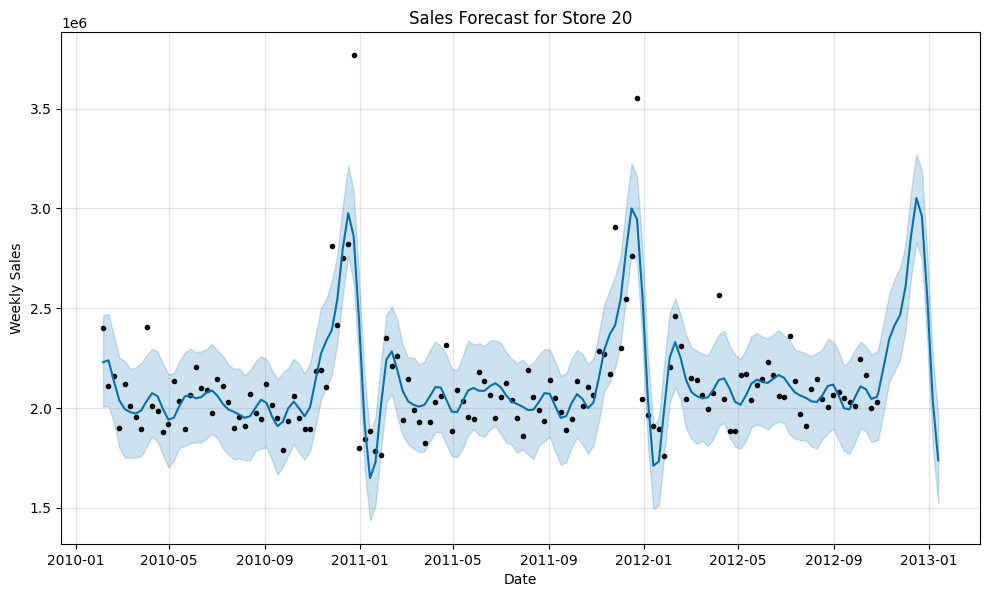

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/3u0j3_kk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/ymg56voi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42849', 'data', 'file=/tmp/tmpddcqt8fc/3u0j3_kk.json', 'init=/tmp/tmpddcqt8fc/ymg56voi.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_model25jrjx6e/prophet_model-20250312193846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


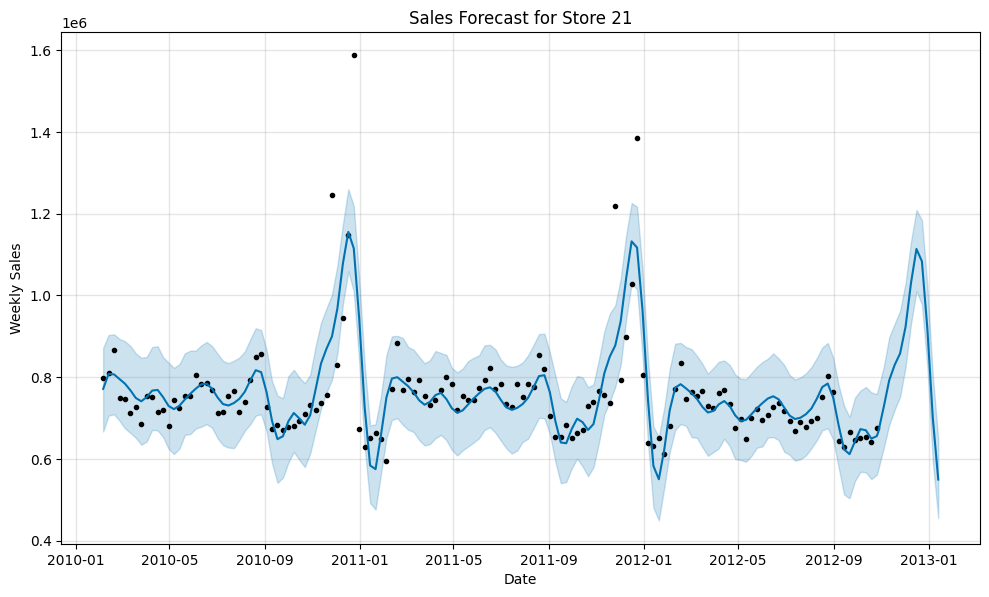

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/_klsxxxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/rg03on0i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83966', 'data', 'file=/tmp/tmpddcqt8fc/_klsxxxs.json', 'init=/tmp/tmpddcqt8fc/rg03on0i.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelu5syctq0/prophet_model-20250312193847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


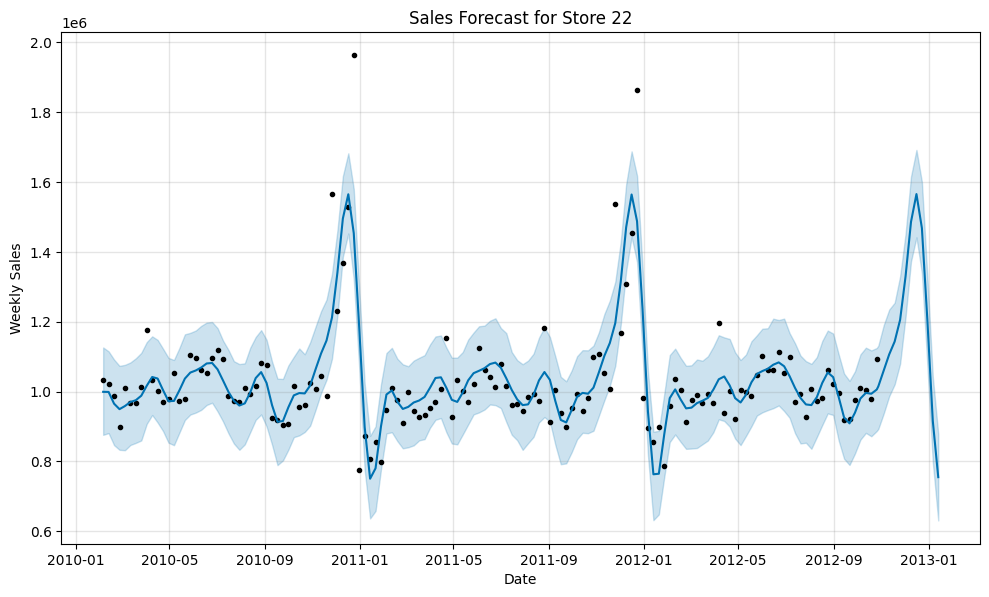

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/rcodtmkx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/gankbb72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17009', 'data', 'file=/tmp/tmpddcqt8fc/rcodtmkx.json', 'init=/tmp/tmpddcqt8fc/gankbb72.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_model8w7g_bvu/prophet_model-20250312193848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


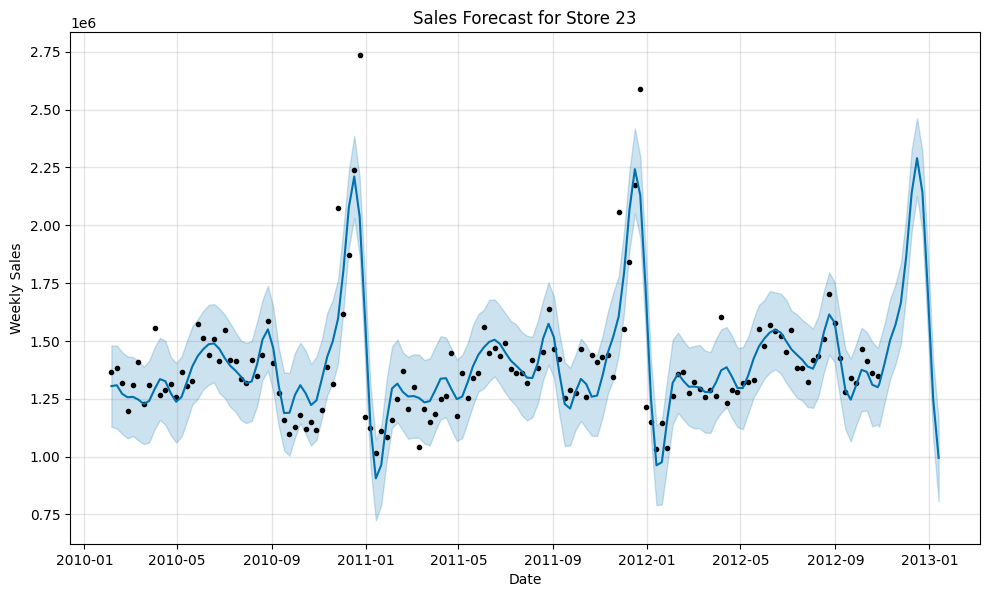

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/9fubhhd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/b5z5eqgc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88020', 'data', 'file=/tmp/tmpddcqt8fc/9fubhhd6.json', 'init=/tmp/tmpddcqt8fc/b5z5eqgc.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelv9r0_0oc/prophet_model-20250312193848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


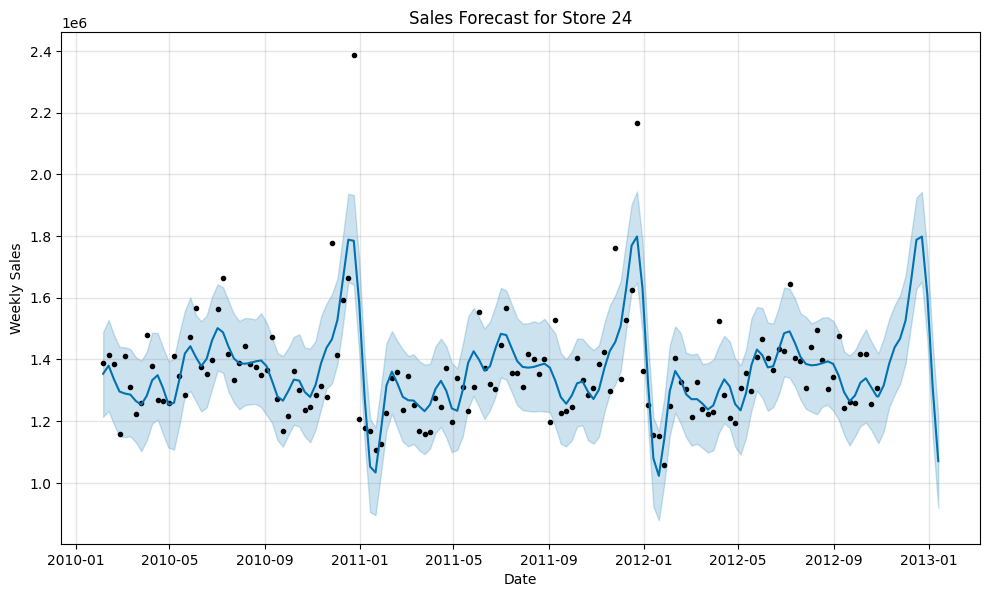

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/xitj9edo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/od04r6gf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32912', 'data', 'file=/tmp/tmpddcqt8fc/xitj9edo.json', 'init=/tmp/tmpddcqt8fc/od04r6gf.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_model5j3hmic0/prophet_model-20250312193849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


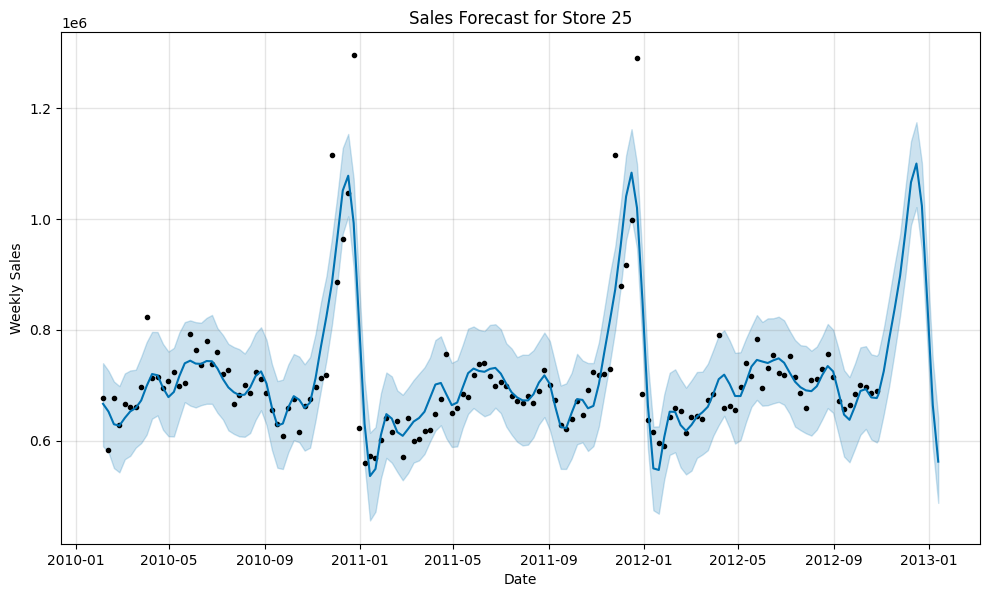

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/0o0741nt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/hr82fbgx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74457', 'data', 'file=/tmp/tmpddcqt8fc/0o0741nt.json', 'init=/tmp/tmpddcqt8fc/hr82fbgx.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelh03ckyw_/prophet_model-20250312193849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


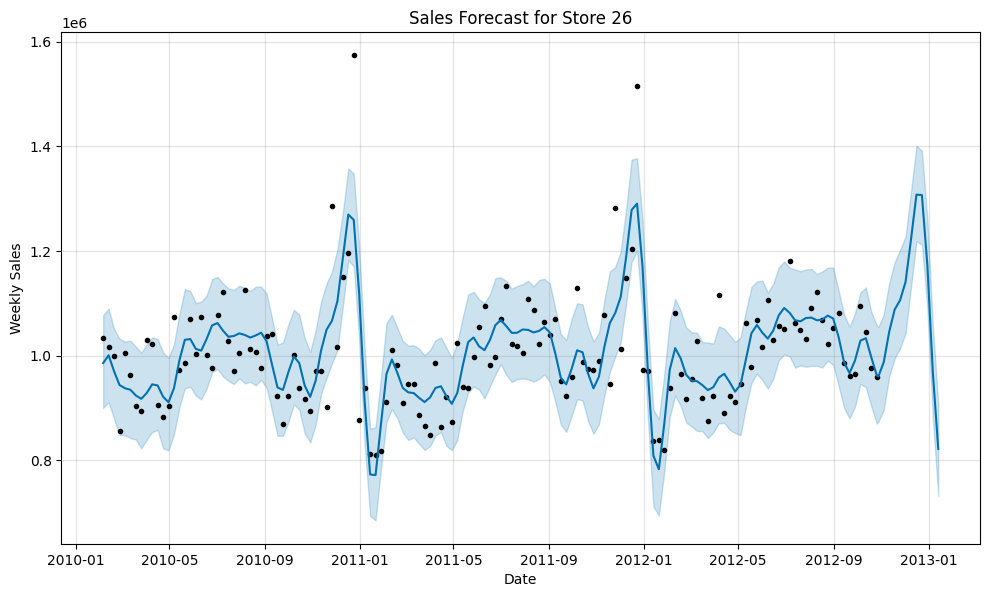

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/wdouwkbi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/awadk3ft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69627', 'data', 'file=/tmp/tmpddcqt8fc/wdouwkbi.json', 'init=/tmp/tmpddcqt8fc/awadk3ft.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_model82kwwpkp/prophet_model-20250312193850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


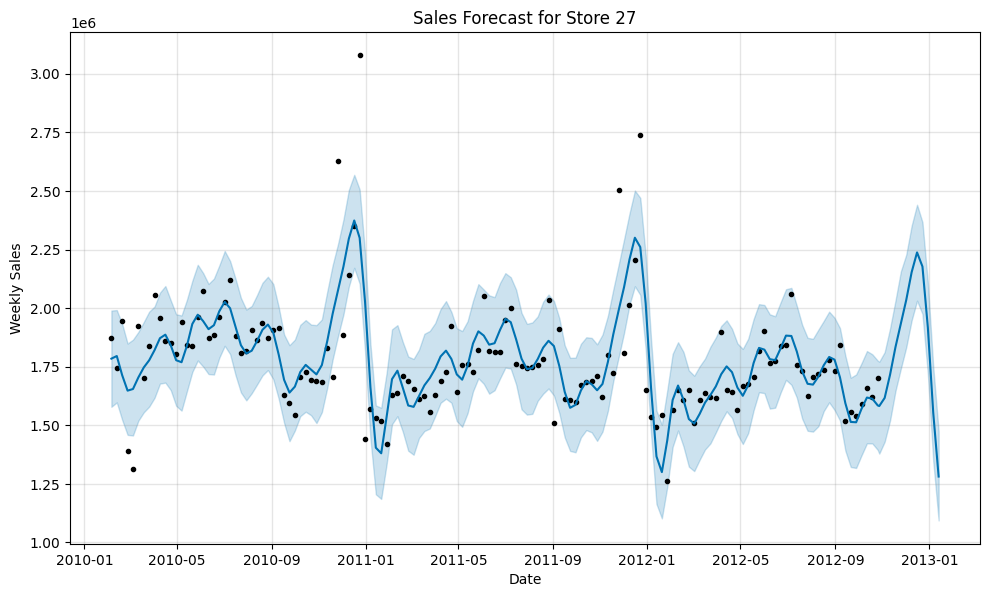

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/e8i4ogb9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/igvc6k1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98053', 'data', 'file=/tmp/tmpddcqt8fc/e8i4ogb9.json', 'init=/tmp/tmpddcqt8fc/igvc6k1b.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_model3eutn5yg/prophet_model-20250312193851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


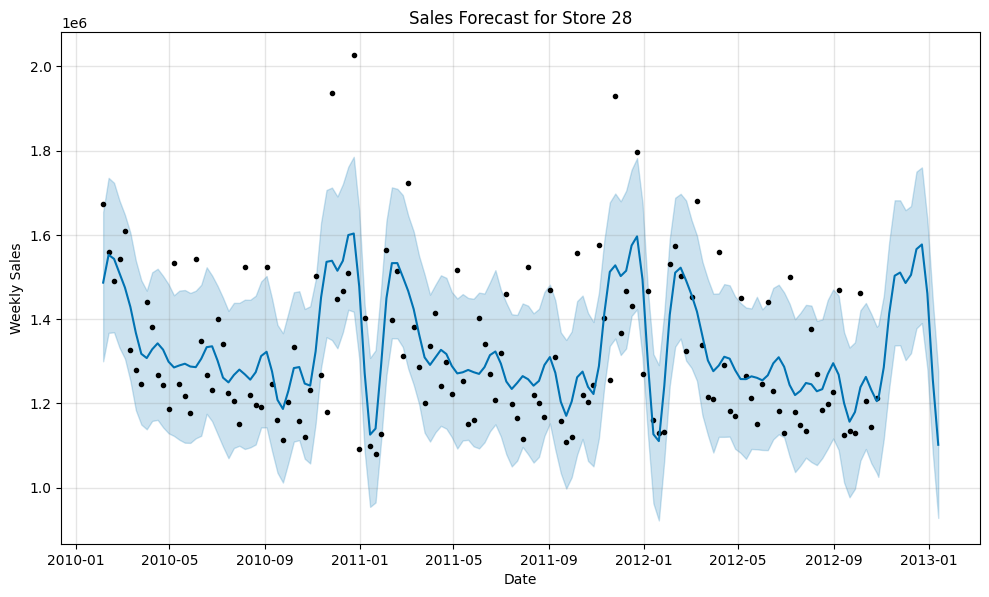

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/przog25e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/3j9ieq13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34010', 'data', 'file=/tmp/tmpddcqt8fc/przog25e.json', 'init=/tmp/tmpddcqt8fc/3j9ieq13.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_model50e857wz/prophet_model-20250312193851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


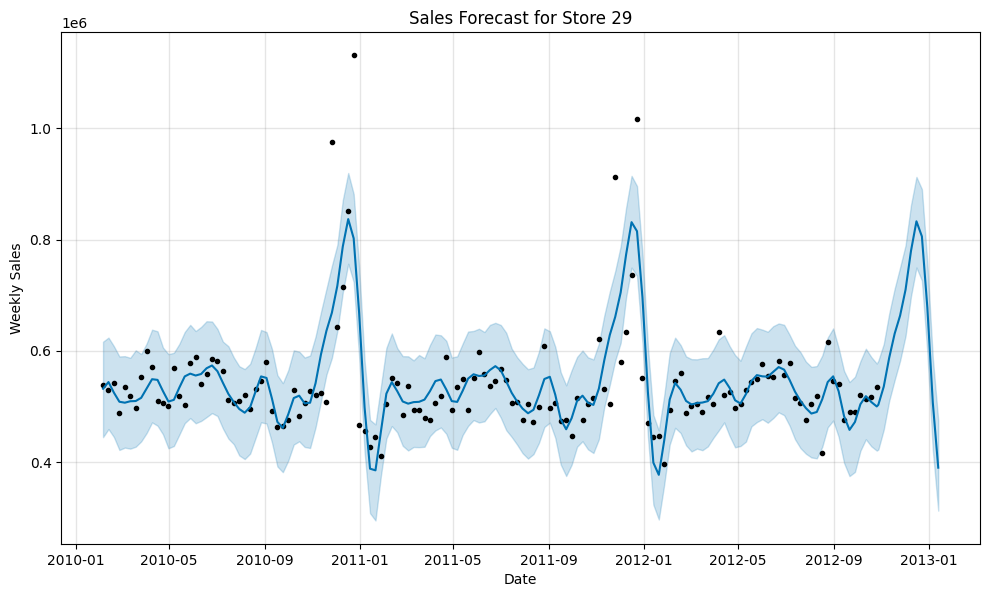

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/nxy2h_vf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/ksobmzj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70225', 'data', 'file=/tmp/tmpddcqt8fc/nxy2h_vf.json', 'init=/tmp/tmpddcqt8fc/ksobmzj7.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelck4q77ct/prophet_model-20250312193852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


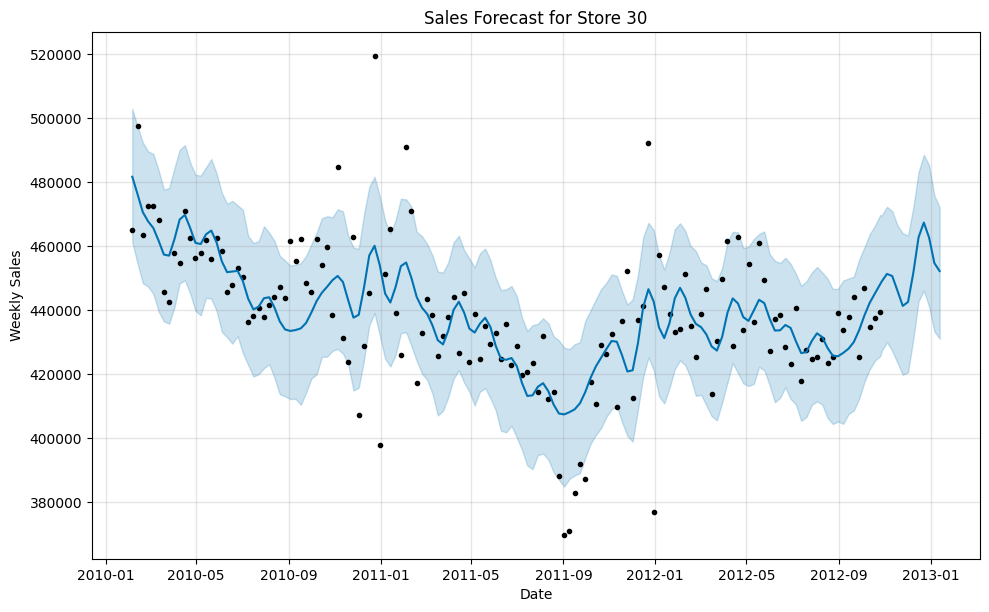

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/cchxzwj9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/_904u1o_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69045', 'data', 'file=/tmp/tmpddcqt8fc/cchxzwj9.json', 'init=/tmp/tmpddcqt8fc/_904u1o_.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelf52su3e3/prophet_model-20250312193853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


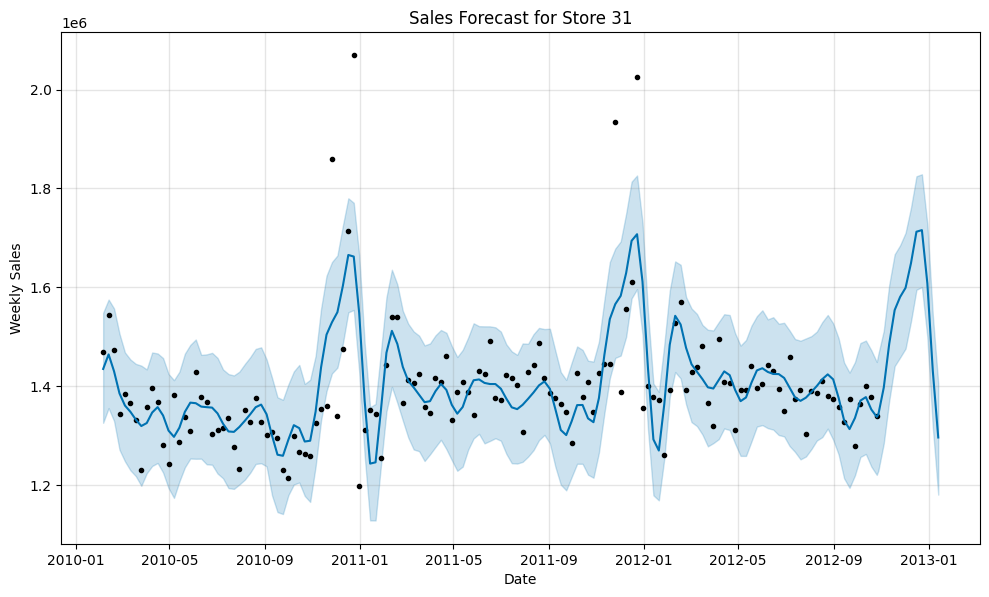

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/jpyotl5f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/1oq6y5ma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34030', 'data', 'file=/tmp/tmpddcqt8fc/jpyotl5f.json', 'init=/tmp/tmpddcqt8fc/1oq6y5ma.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modeltna9upsi/prophet_model-20250312193853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


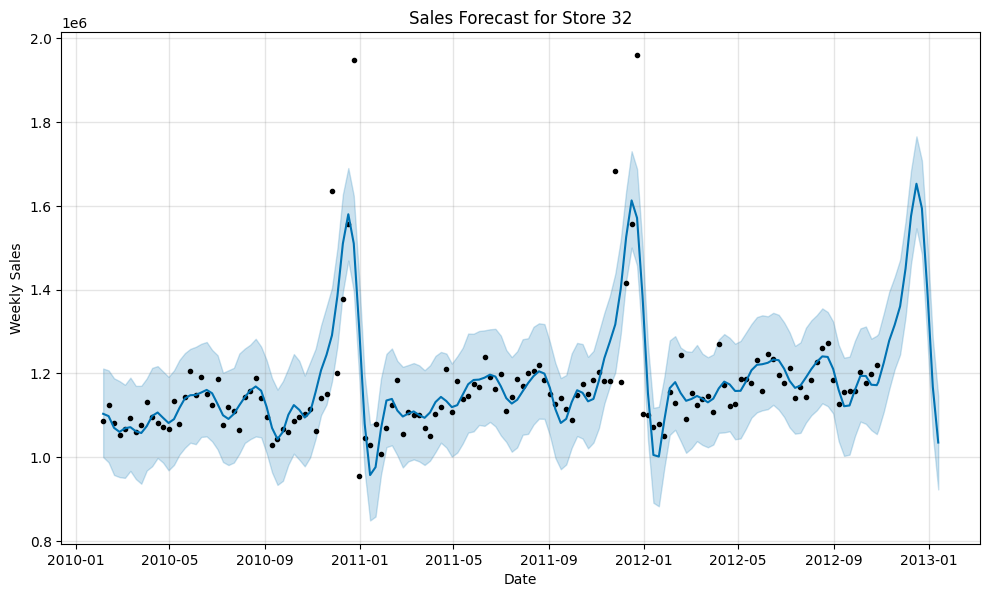

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/qyrj6c3e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/kbkps5a2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48984', 'data', 'file=/tmp/tmpddcqt8fc/qyrj6c3e.json', 'init=/tmp/tmpddcqt8fc/kbkps5a2.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelfob3xpkh/prophet_model-20250312193854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


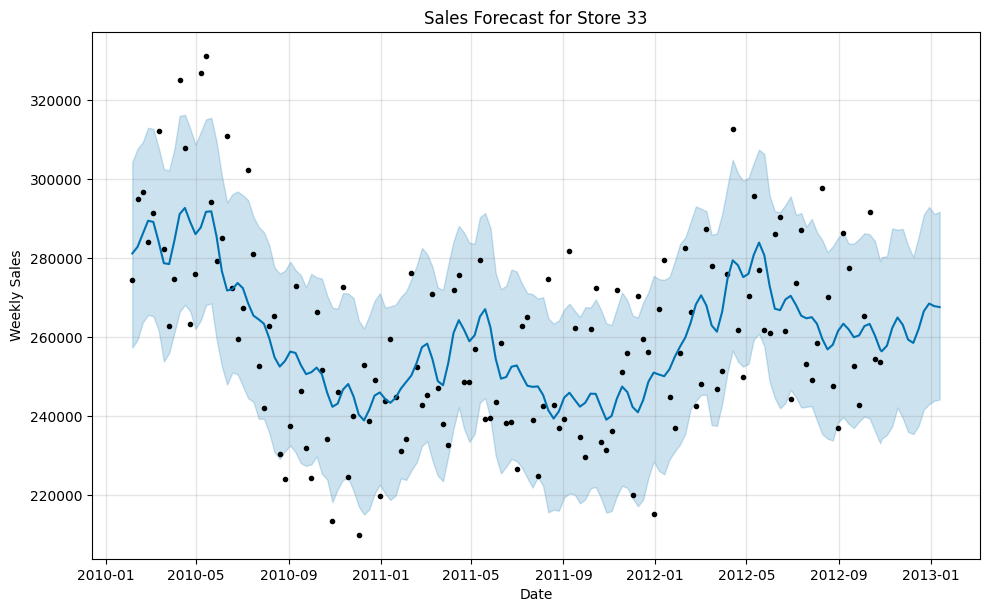

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/xo1jbenp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/zqxg1xyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32127', 'data', 'file=/tmp/tmpddcqt8fc/xo1jbenp.json', 'init=/tmp/tmpddcqt8fc/zqxg1xyv.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelim_hcre_/prophet_model-20250312193854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


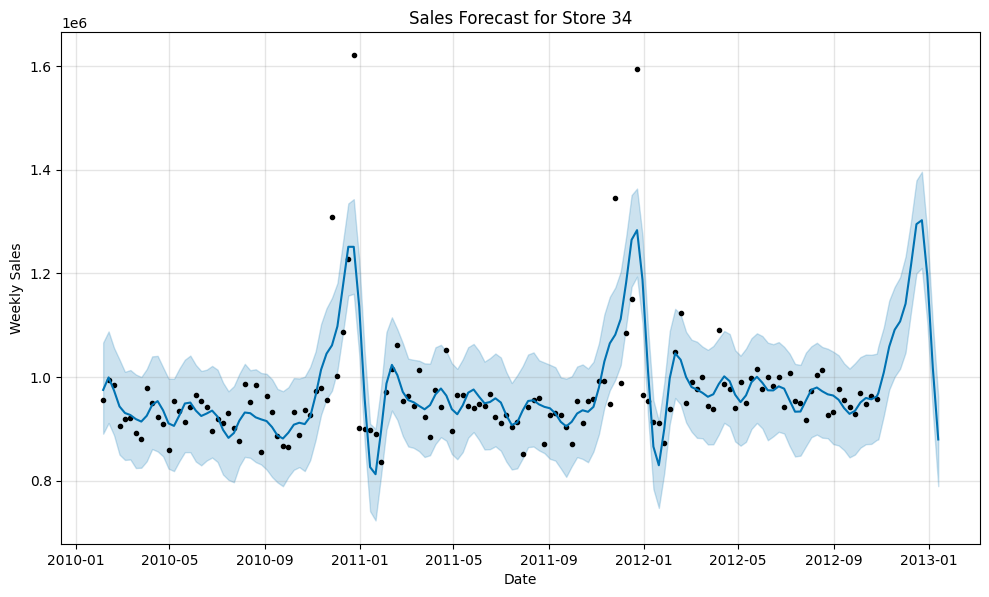

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/xva6ex_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/ad1og8t7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55715', 'data', 'file=/tmp/tmpddcqt8fc/xva6ex_w.json', 'init=/tmp/tmpddcqt8fc/ad1og8t7.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_model55n4ke0i/prophet_model-20250312193855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


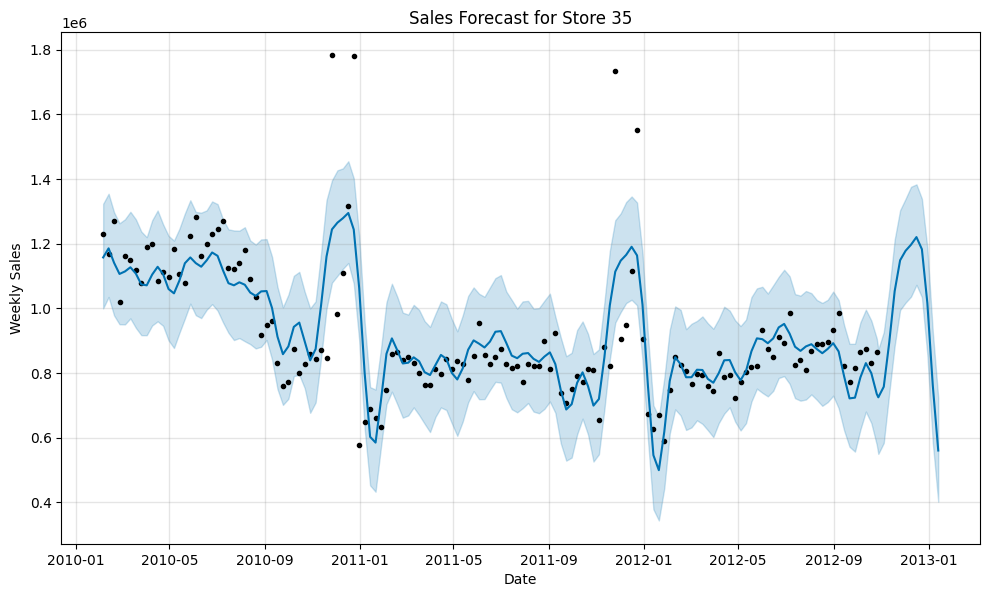

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/c15_63i3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/dyjisjx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29287', 'data', 'file=/tmp/tmpddcqt8fc/c15_63i3.json', 'init=/tmp/tmpddcqt8fc/dyjisjx3.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modellsllyp5b/prophet_model-20250312193856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


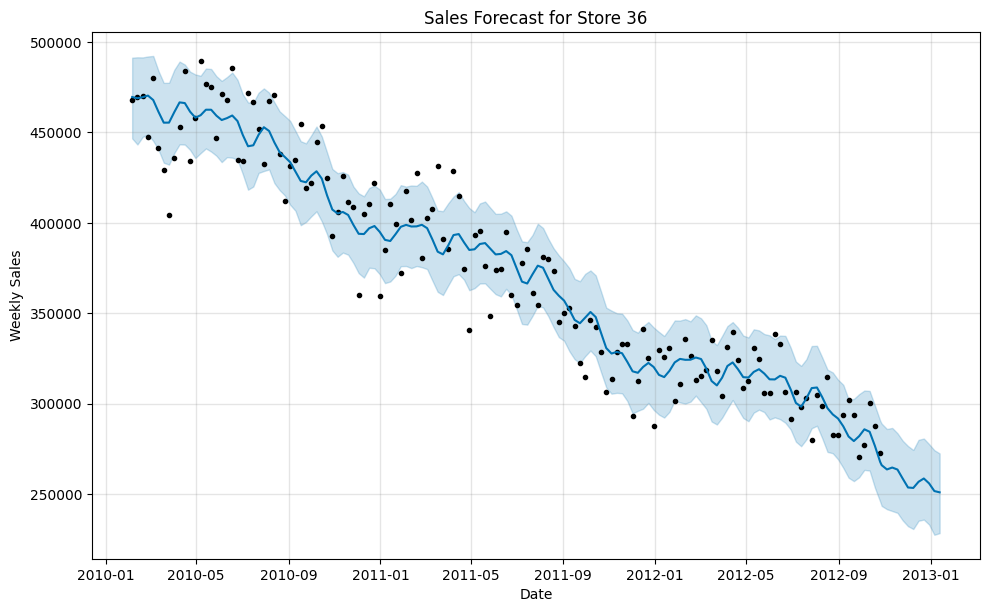

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/f64ah1nz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/is0geypm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25078', 'data', 'file=/tmp/tmpddcqt8fc/f64ah1nz.json', 'init=/tmp/tmpddcqt8fc/is0geypm.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelsxq8k695/prophet_model-20250312193856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


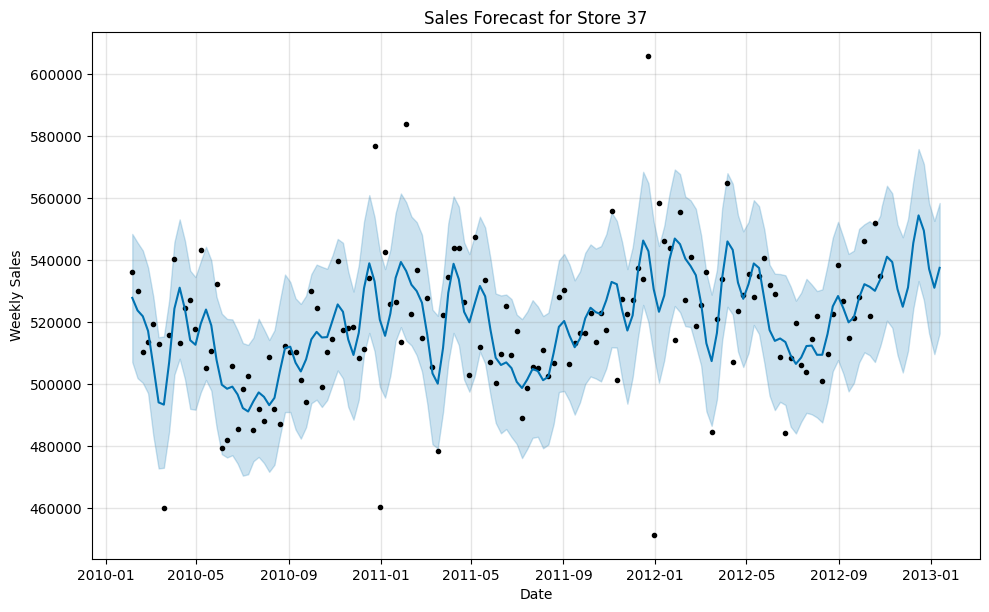

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/jdpm_ypd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/cvpii1q2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5420', 'data', 'file=/tmp/tmpddcqt8fc/jdpm_ypd.json', 'init=/tmp/tmpddcqt8fc/cvpii1q2.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelvet38fle/prophet_model-20250312193857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


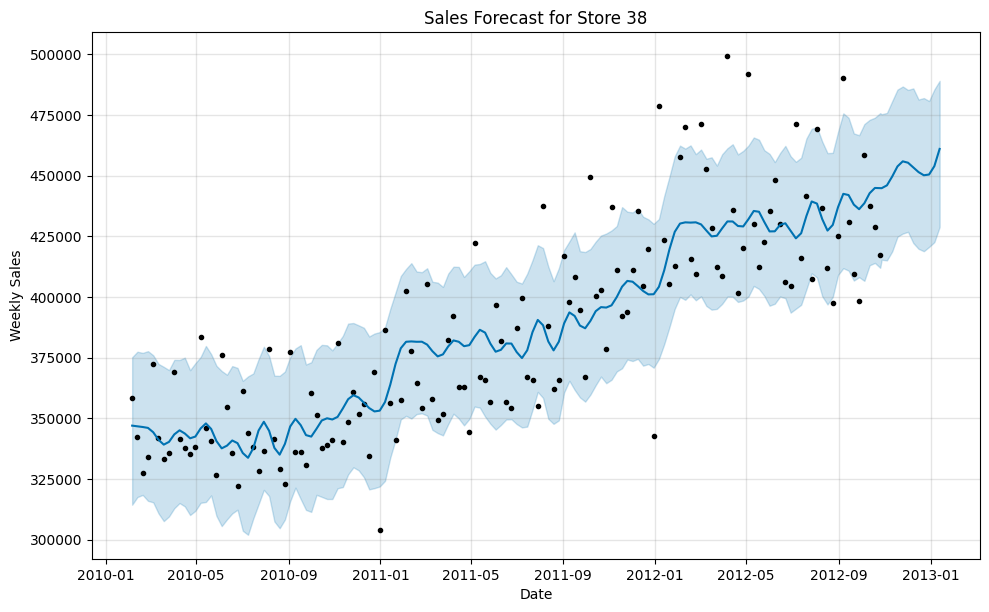

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/_vgsqd2v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/klq2r7_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18561', 'data', 'file=/tmp/tmpddcqt8fc/_vgsqd2v.json', 'init=/tmp/tmpddcqt8fc/klq2r7_z.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelgemnc8xq/prophet_model-20250312193858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


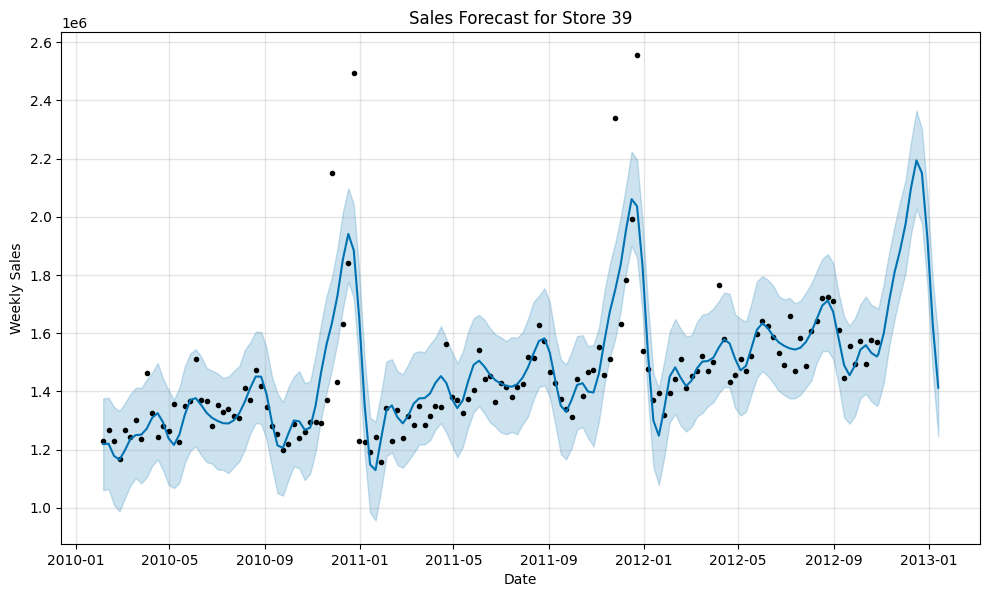

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/ky08_xz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/i805fxu4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34285', 'data', 'file=/tmp/tmpddcqt8fc/ky08_xz9.json', 'init=/tmp/tmpddcqt8fc/i805fxu4.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modeljjmilx8r/prophet_model-20250312193858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


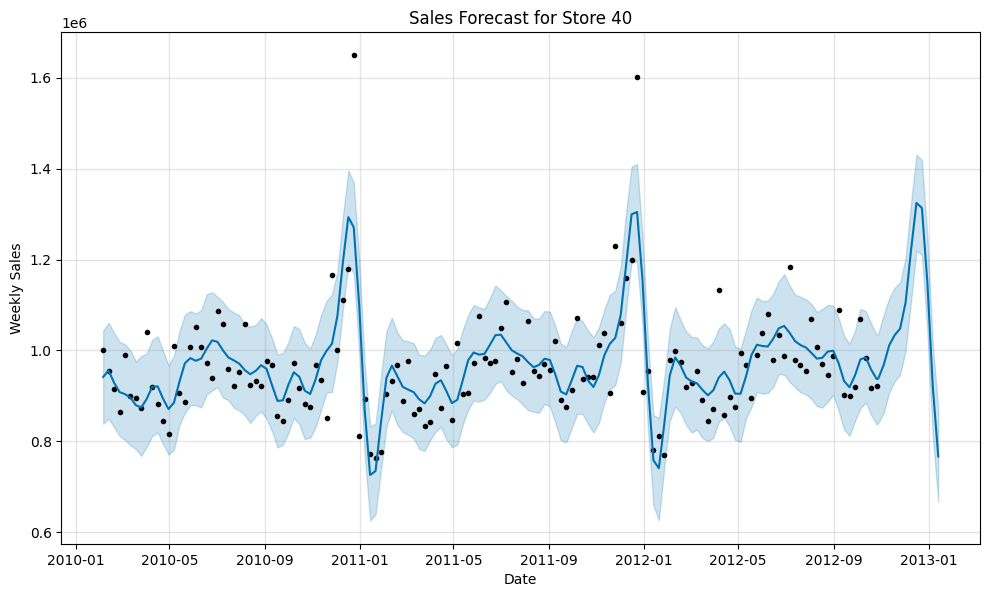

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/z25dlrmg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/cq00gbkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75554', 'data', 'file=/tmp/tmpddcqt8fc/z25dlrmg.json', 'init=/tmp/tmpddcqt8fc/cq00gbkj.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelhu19f_4h/prophet_model-20250312193859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


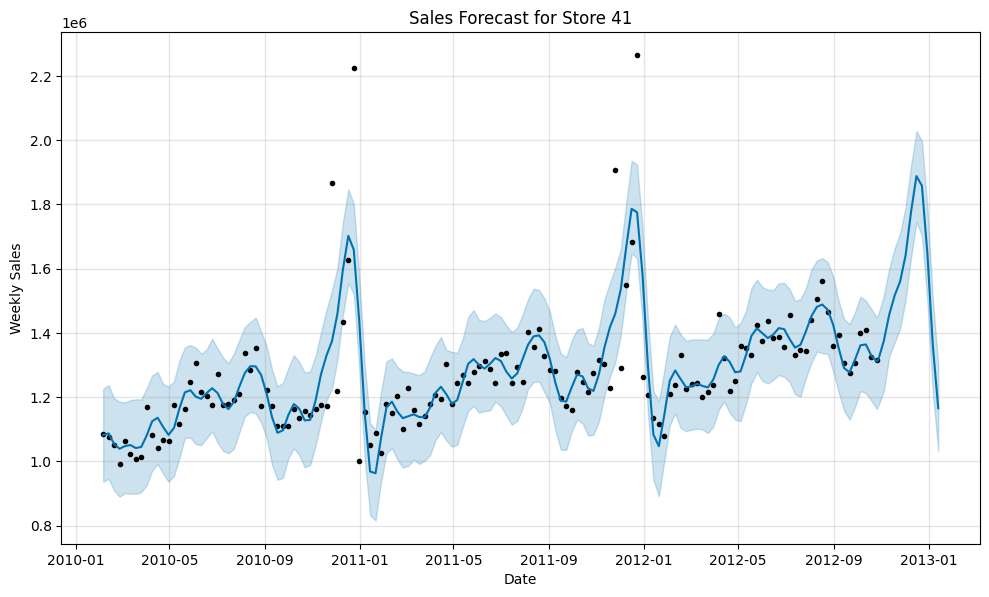

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/omawa2as.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/iwjcozfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15229', 'data', 'file=/tmp/tmpddcqt8fc/omawa2as.json', 'init=/tmp/tmpddcqt8fc/iwjcozfv.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modeln30jk57u/prophet_model-20250312193900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:39:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:39:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


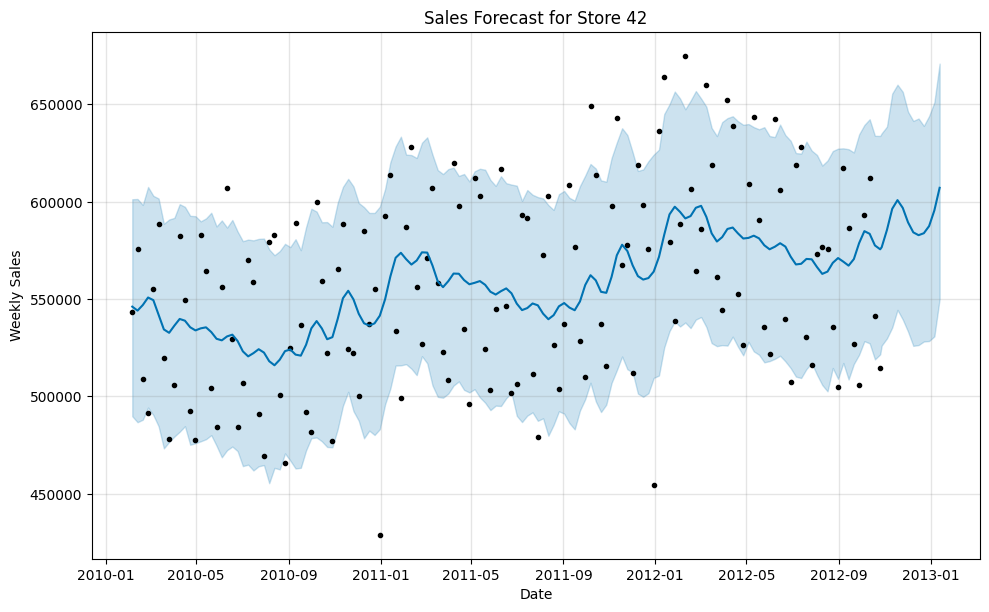

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/8sv4vz6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/x5fnblmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62487', 'data', 'file=/tmp/tmpddcqt8fc/8sv4vz6g.json', 'init=/tmp/tmpddcqt8fc/x5fnblmr.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modely3aflbcz/prophet_model-20250312193900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:39:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:39:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


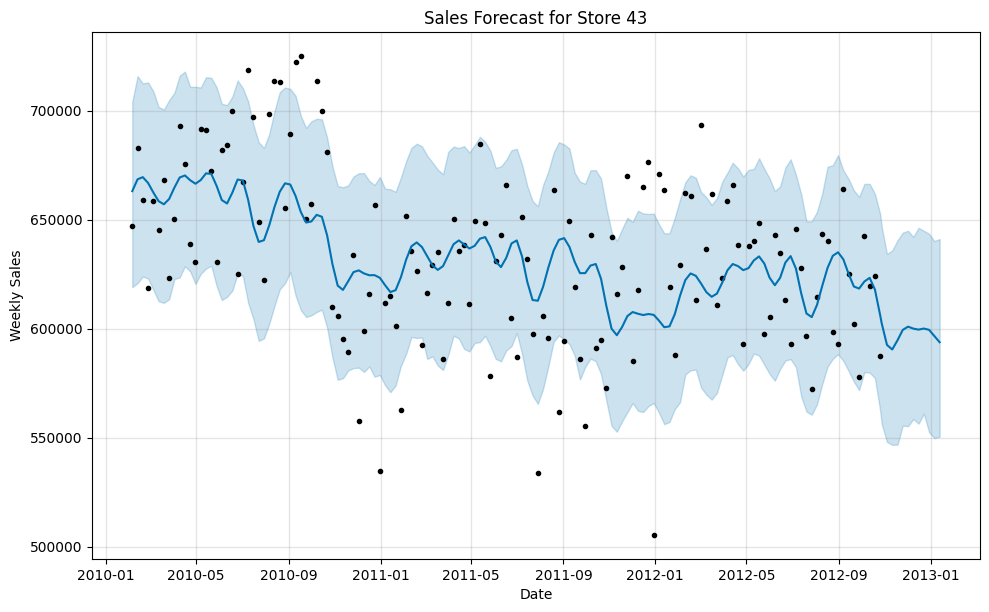

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/w122bxny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/9jsffbw0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94706', 'data', 'file=/tmp/tmpddcqt8fc/w122bxny.json', 'init=/tmp/tmpddcqt8fc/9jsffbw0.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelvy87ibgy/prophet_model-20250312193901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:39:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:39:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


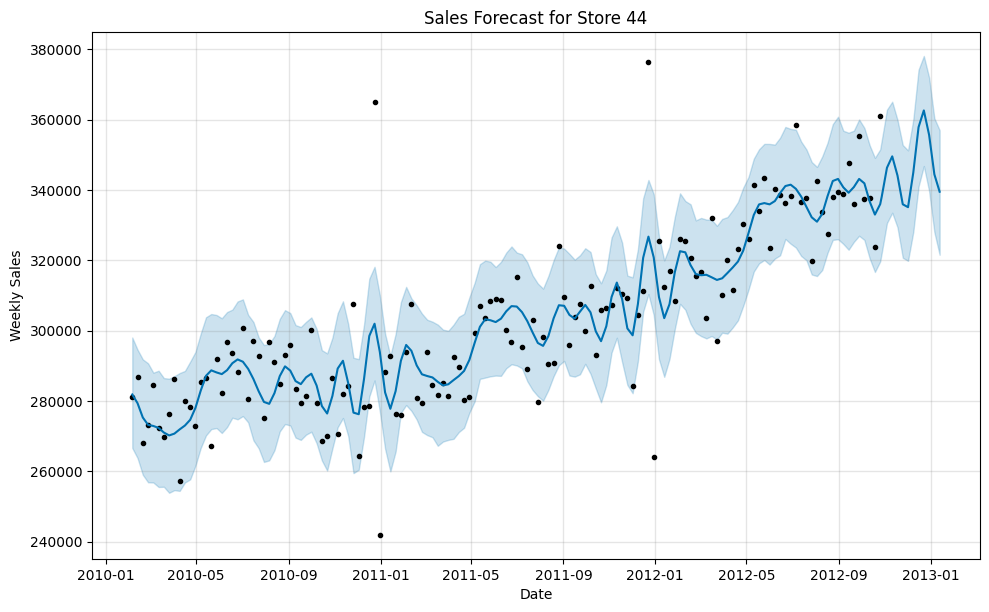

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/2c6cwa1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddcqt8fc/izipz73l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33929', 'data', 'file=/tmp/tmpddcqt8fc/2c6cwa1w.json', 'init=/tmp/tmpddcqt8fc/izipz73l.json', 'output', 'file=/tmp/tmpddcqt8fc/prophet_modelouiki4tm/prophet_model-20250312193902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:39:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:39:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


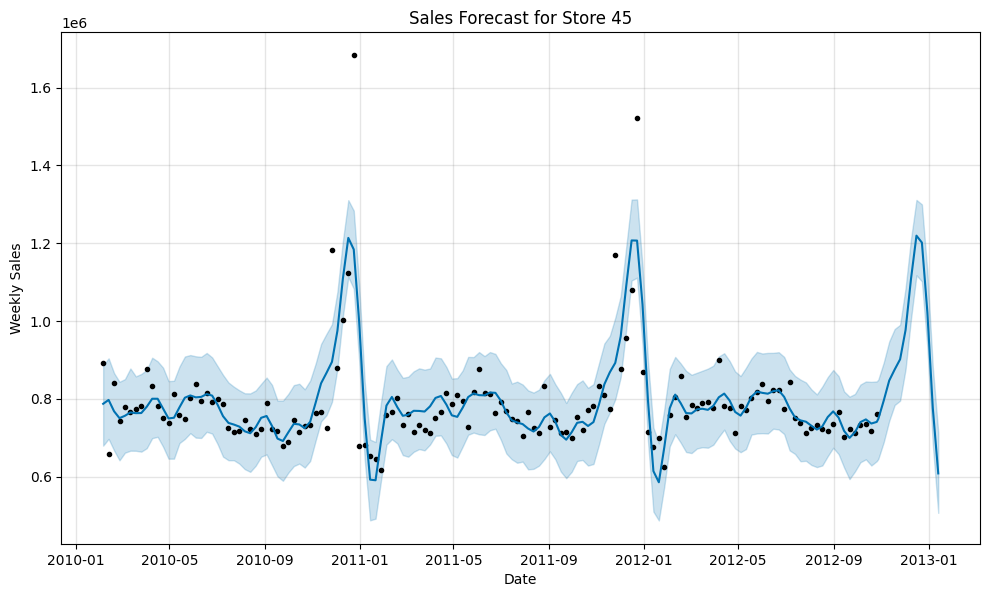

In [37]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Dictionary to store forecasts for each store
store_forecasts = {}

# Loop through each store and fit a Prophet model
for store, data in store_data.items():
    # Prepare data for Prophet (requires columns 'ds' and 'y')
    prophet_data = data[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(prophet_data)

    # Create a dataframe for future predictions (next 12 weeks)
    future = model.make_future_dataframe(periods=12, freq='W')

    # Make predictions
    forecast = model.predict(future)

    # Store the forecast
    store_forecasts[store] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f'Sales Forecast for Store {store}')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.show()

In [38]:
# Display forecast for Store 1
print(store_forecasts[1].tail(12))

            ds          yhat    yhat_lower    yhat_upper
143 2012-10-28  1.533722e+06  1.406818e+06  1.667952e+06
144 2012-11-04  1.599966e+06  1.462990e+06  1.728365e+06
145 2012-11-11  1.690154e+06  1.555444e+06  1.825580e+06
146 2012-11-18  1.747222e+06  1.607988e+06  1.874383e+06
147 2012-11-25  1.768336e+06  1.632973e+06  1.896870e+06
148 2012-12-02  1.810911e+06  1.679686e+06  1.944639e+06
149 2012-12-09  1.913994e+06  1.772734e+06  2.047814e+06
150 2012-12-16  2.024516e+06  1.887518e+06  2.157944e+06
151 2012-12-23  2.026088e+06  1.878135e+06  2.161555e+06
152 2012-12-30  1.856234e+06  1.716281e+06  1.985138e+06
153 2013-01-06  1.590309e+06  1.454641e+06  1.728541e+06
154 2013-01-13  1.394522e+06  1.256722e+06  1.535938e+06


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate for a specific store (e.g., Store 1)
actual_sales = store_data[1]['Weekly_Sales']
predicted_sales = store_forecasts[1]['yhat'][:len(actual_sales)]

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_sales, predicted_sales)
mse = mean_squared_error(actual_sales, predicted_sales)
rmse = np.sqrt(mse)  # Manually calculate RMSE

print(f"Store 1 - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Store 1 - MAE: 76151.72, RMSE: 106875.93


<ipython-input-40-efd3c3b417ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['Store'] = store


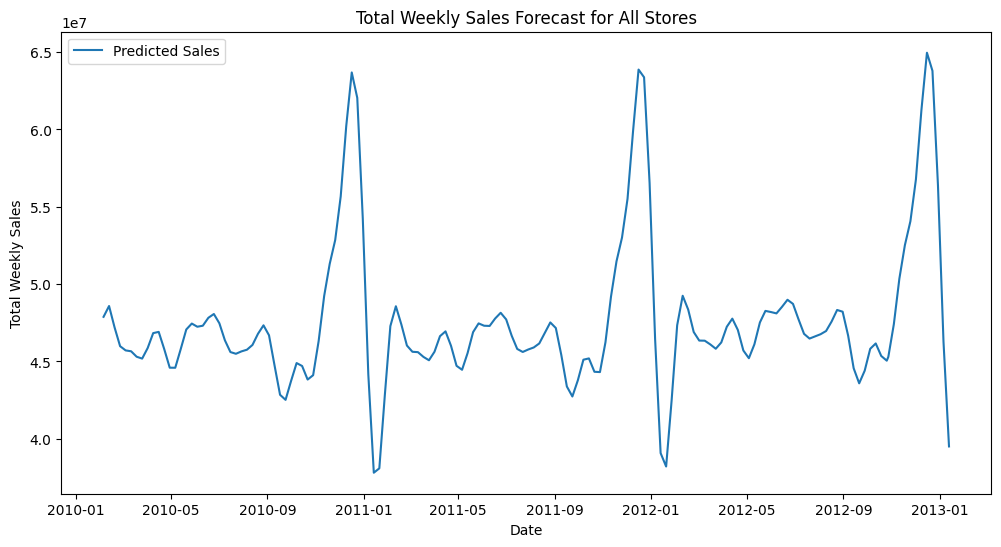

In [40]:
# Aggregate forecasts for all stores
total_forecast = pd.DataFrame()

for store, forecast in store_forecasts.items():
    forecast['Store'] = store
    total_forecast = pd.concat([total_forecast, forecast])

# Group by date and sum the predicted sales
total_forecast_aggregated = total_forecast.groupby('ds')['yhat'].sum().reset_index()

# Plot the total forecast
plt.figure(figsize=(12, 6))
plt.plot(total_forecast_aggregated['ds'], total_forecast_aggregated['yhat'], label='Predicted Sales')
plt.title('Total Weekly Sales Forecast for All Stores')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


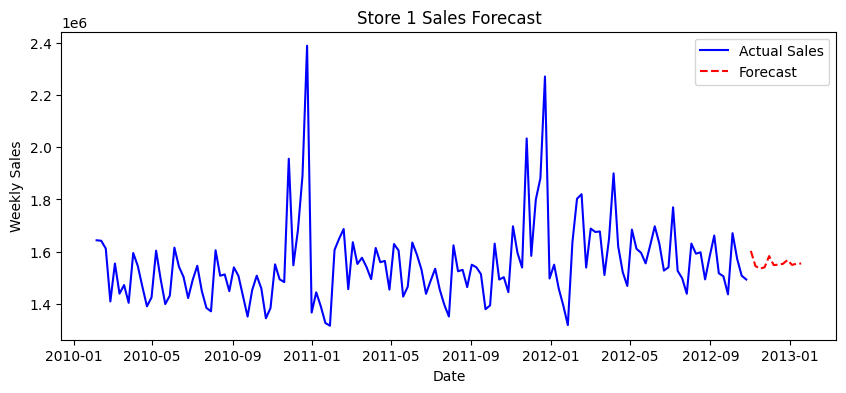

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


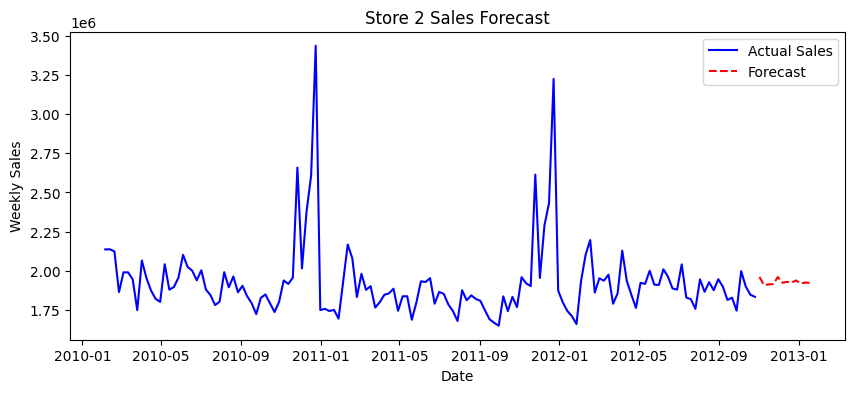

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


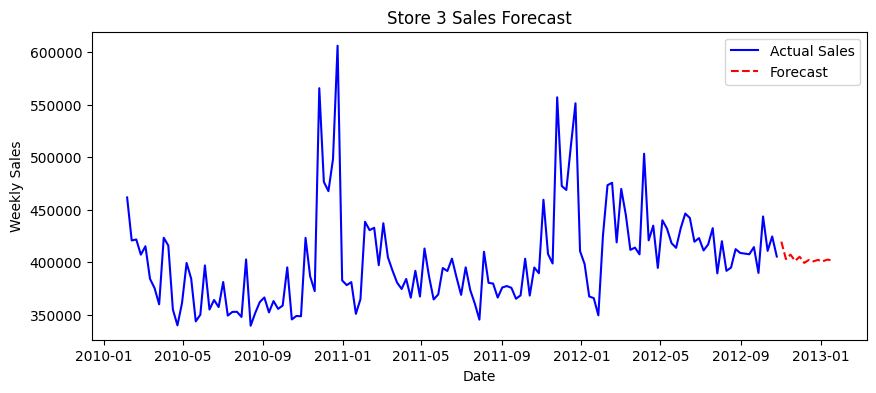

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


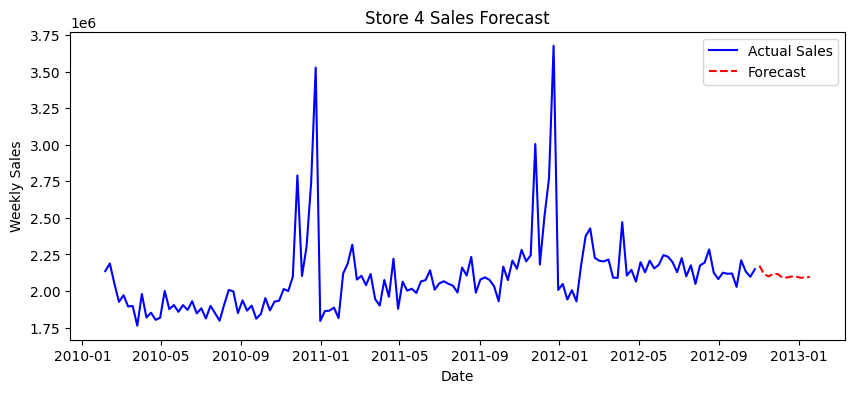

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


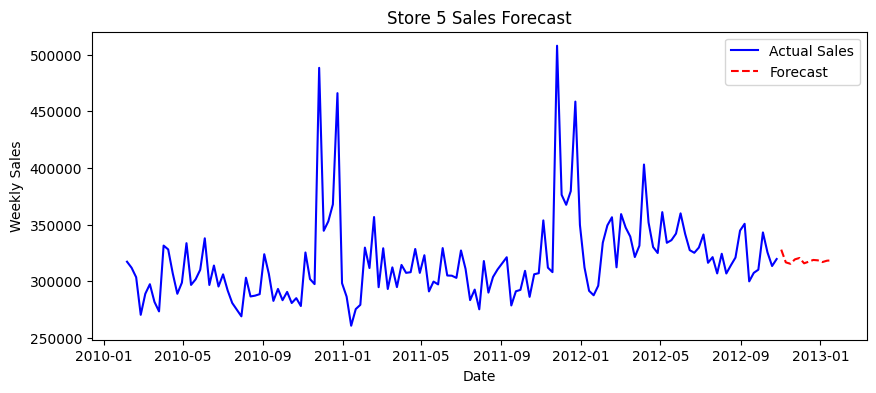

2012-11-02    1.603040e+06
2012-11-09    1.545244e+06
2012-11-16    1.535016e+06
2012-11-23    1.540398e+06
2012-11-30    1.583258e+06
2012-12-07    1.548730e+06
2012-12-14    1.550534e+06
2012-12-21    1.553547e+06
2012-12-28    1.568024e+06
2013-01-04    1.549706e+06
2013-01-11    1.553959e+06
2013-01-18    1.555019e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [44]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Convert 'Date' to datetime and set index
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

# Select 5 stores with sufficient data
selected_stores = df["Store"].unique()[:5]  # Selecting first 5 stores

# Dictionary to store forecasts
forecasts = {}

# Loop through each store and apply ARIMA forecasting
for store in selected_stores:
    store_data = df[df["Store"] == store].set_index("Date")["Weekly_Sales"]

    # Check stationarity using ADF test
    adf_pvalue = sm.tsa.adfuller(store_data.dropna())[1]
    diff_order = 1 if adf_pvalue > 0.05 else 0  # Differencing if non-stationary

    # Fit ARIMA model
    model = ARIMA(store_data, order=(5, diff_order, 0))
    arima_result = model.fit()

    # Forecast next 12 weeks
    forecast = arima_result.forecast(steps=12)
    forecasts[store] = forecast

    # Plot actual vs forecasted values
    plt.figure(figsize=(10, 4))
    plt.plot(store_data, label="Actual Sales", color="blue")
    plt.plot(forecast.index, forecast, label="Forecast", color="red", linestyle="dashed")
    plt.title(f"Store {store} Sales Forecast")
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")
    plt.legend()
    plt.show()

# Display forecast for the first selected store
forecasts[selected_stores[0]]
